In [1]:
import pandas as pd

data_file = pd.read_excel('data/anamnesis.xlsx')

german_columns = list(data_file.columns) 

translation_dict = {
    ##### Features #####
    'SchiefstandBewegungMmDurchschnitt_links': 'Misalignment_Movement_Avg_left',
    'SchiefstandBewegungMmDurchschnitt_rechts': 'Misalignment_Movement_Avg_right',
    'SchiefstandRuheMmDurchschnitt_links': 'Misalignment_Rest_Avg_left',
    'SchiefstandRuheMmDurchschnitt_rechts': 'Misalignment_Rest_Avg_right',
    'AuftrittDurchschnitt_links': 'Gait_Avg_left',
    'AuftrittDurchschnitt_rechts': 'Gait_Avg_right',
    'Schuhgröße': 'ShoeSize',
    
    ##### Targets #####
    # binary start #
    'Schmerz_Vorfuß_Links': 'Pain_Forefoot_Left',
    'Schmerz_Vorfuß_Rechts': 'Pain_Forefoot_Right',
    'Schmerz_Mittelfuß_Links': 'Pain_Midfoot_Left',
    'Schmerz_Mittelfuß_Rechts': 'Pain_Midfoot_Right',
    'Schmerz_Ferse_Links': 'Pain_Heel_Left',
    'Schmerz_Ferse_Rechts': 'Pain_Heel_Right',
    # binary end #
    
    # non-binary start # 
    'Schmerz_Stirn': 'Pain_Forehead',
    'Schmerz_Scheitel': 'Pain_Crown',
    'Schmerz_Nackenmuskeln': 'Pain_Neck_Muscles',
    'Schmerz_Nackenwirbelsäule': 'Pain_Cervical_Spine',
    'Schmerz_Brustwirbelsäule': 'Pain_Thoracic_Spine',
    'Schmerz_Schulter+Arm_Links': 'Pain_Shoulder_Arm_Left',
    'Schmerz_Schulter+Arm_Rechts': 'Pain_Shoulder_Arm_Right',
    'Schmerz_Lendenwirbelsäule': 'Pain_Lumbar_Spine',
    'Schmerz_Hüfte_Links': 'Pain_Hip_Left',
    'Schmerz_Hüfte_Rechts': 'Pain_Hip_Right',
    'Schmerz_Po+Oberschenkel_Links': 'Pain_Buttock_Thigh_Left',
    'Schmerz_Po+Oberschenkel_Rechts': 'Pain_Buttock_Thigh_Right',
    'Schmerz_Knie_Links': 'Pain_Knee_Left',
    'Schmerz_Knie_Rechts': 'Pain_Knee_Right',
    'Schmerz_Unterschenkel_Links': 'Pain_Lower_Leg_Left',
    'Schmerz_Unterschenkel_Rechts': 'Pain_Lower_Leg_Right',
    'Schmerz_Sprunggelenk_Links': 'Pain_Ankle_Left',
    'Schmerz_Sprunggelenk_Rechts': 'Pain_Ankle_Right',
    'RestlessLegs_Syndrom': 'Restless_Legs_Syndrome',
    'Schwindel+Sturzneigung': 'Dizziness_Fall_Tendency',
    'Vibrieren_im_Körper': 'Body_Vibration',
    'Unruhiger_Schlaf': 'Restless_Sleep',
    'Antriebslosigkeit': 'Lack_Of_Drive',
    'Konzentrationsschwierigkeiten': 'Concentration_Difficulty',
    # non-binary end #  
    # binary start #
    'Schmerz_Handgelenk_links': 'Pain_Wrist_Left',
    'Schmerz_Handgelenk_rechts': 'Pain_Wrist_Right',
    'Schmerz_Ellenbogen_links': 'Pain_Elbow_Left',
    'Schmerz_Ellenbogen_rechts': 'Pain_Elbow_Right',
    'Schmerz_Finger_links': 'Pain_Finger_Left',
    'Schmerz_Finger_rechts': 'Pain_Finger_Right',
    'Schmerz_Oberarm_links': 'Pain_Upper_Arm_Left',
    'Schmerz_Oberarm_rechts': 'Pain_Upper_Arm_Right',
    'Schmerz_Daumen_links': 'Pain_Thumb_Left',
    'Schmerz_Daumen_rechts': 'Pain_Thumb_Right',
    'Schmerz_Unterarm_links': 'Pain_Forearm_Left',
    'Schmerz_Unterarm_rechts': 'Pain_Forearm_Right'
    # binary end #
}

In [2]:
all(col in translation_dict.keys() for col in german_columns)

True

In [3]:
data_file.columns = [translation_dict.get(col, col) for col in german_columns]
data_file.columns
data_file.to_csv('data/anamnesis_translated.csv', index=False)

## 1. Define feature and target columns 

In [4]:
import pandas as pd

en_data_file = pd.read_csv('data/anamnesis_translated.csv')

feature_columns = list(en_data_file.columns)[:7]
target_columns = list(en_data_file.columns)[7:]
print(feature_columns)
print(target_columns)

['Misalignment_Movement_Avg_left', 'Misalignment_Movement_Avg_right', 'Misalignment_Rest_Avg_left', 'Misalignment_Rest_Avg_right', 'Gait_Avg_left', 'Gait_Avg_right', 'ShoeSize']
['Pain_Forefoot_Left', 'Pain_Forefoot_Right', 'Pain_Midfoot_Left', 'Pain_Midfoot_Right', 'Pain_Heel_Left', 'Pain_Heel_Right', 'Pain_Forehead', 'Pain_Crown', 'Pain_Neck_Muscles', 'Pain_Cervical_Spine', 'Pain_Thoracic_Spine', 'Pain_Shoulder_Arm_Left', 'Pain_Shoulder_Arm_Right', 'Pain_Lumbar_Spine', 'Pain_Hip_Left', 'Pain_Hip_Right', 'Pain_Buttock_Thigh_Left', 'Pain_Buttock_Thigh_Right', 'Pain_Knee_Left', 'Pain_Knee_Right', 'Pain_Lower_Leg_Left', 'Pain_Lower_Leg_Right', 'Pain_Ankle_Left', 'Pain_Ankle_Right', 'Restless_Legs_Syndrome', 'Dizziness_Fall_Tendency', 'Body_Vibration', 'Restless_Sleep', 'Lack_Of_Drive', 'Concentration_Difficulty', 'Pain_Wrist_Left', 'Pain_Wrist_Right', 'Pain_Elbow_Left', 'Pain_Elbow_Right', 'Pain_Finger_Left', 'Pain_Finger_Right', 'Pain_Upper_Arm_Left', 'Pain_Upper_Arm_Right', 'Pain_Thumb

In [5]:
# Separating feature and target data ( binary and non-binary target columns )

feature_data = en_data_file[feature_columns]
target_data = en_data_file[target_columns]

# non-binary target columns
non_binary_target_columns = [col for col in target_columns if en_data_file[col].nunique() != 2]

# binary target columns
binary_target_columns = [col for col in target_columns if en_data_file[col].nunique() == 2]

print(non_binary_target_columns)
print(binary_target_columns)


['Pain_Forehead', 'Pain_Crown', 'Pain_Neck_Muscles', 'Pain_Cervical_Spine', 'Pain_Thoracic_Spine', 'Pain_Shoulder_Arm_Left', 'Pain_Shoulder_Arm_Right', 'Pain_Lumbar_Spine', 'Pain_Hip_Left', 'Pain_Hip_Right', 'Pain_Buttock_Thigh_Left', 'Pain_Buttock_Thigh_Right', 'Pain_Knee_Left', 'Pain_Knee_Right', 'Pain_Lower_Leg_Left', 'Pain_Lower_Leg_Right', 'Pain_Ankle_Left', 'Pain_Ankle_Right', 'Restless_Legs_Syndrome', 'Dizziness_Fall_Tendency', 'Body_Vibration', 'Restless_Sleep', 'Lack_Of_Drive', 'Concentration_Difficulty']
['Pain_Forefoot_Left', 'Pain_Forefoot_Right', 'Pain_Midfoot_Left', 'Pain_Midfoot_Right', 'Pain_Heel_Left', 'Pain_Heel_Right', 'Pain_Wrist_Left', 'Pain_Wrist_Right', 'Pain_Elbow_Left', 'Pain_Elbow_Right', 'Pain_Finger_Left', 'Pain_Finger_Right', 'Pain_Upper_Arm_Left', 'Pain_Upper_Arm_Right', 'Pain_Thumb_Left', 'Pain_Thumb_Right', 'Pain_Forearm_Left', 'Pain_Forearm_Right']


In [6]:
# check if all target columns are in the list
print(all(col in non_binary_target_columns + binary_target_columns for col in target_columns))
print(len(target_columns) == len(non_binary_target_columns) + len(binary_target_columns))

True
True


---

## 2. Data Inspection

In [7]:
en_data_file

Misalignment_Movement_Avg_left  Misalignment_Movement_Avg_right  \
0                                1.2                              0.8   
1                                0.6                              2.2   
2                                0.2                              2.0   
3                                2.7                              0.7   
4                               -5.6                             -5.9   
...                              ...                              ...   
2598                             4.7                              1.4   
2599                             2.0                              1.1   
2600                            -3.5                             -2.8   
2601                            -0.3                              1.5   
2602                             2.9                            -11.6   

      Misalignment_Rest_Avg_left  Misalignment_Rest_Avg_right  Gait_Avg_left  \
0                            2.1                         -0.2            3.2   
1                            0.5                          3.4            3.3   
2                            0.4                          2.7            3.7   
3                            3.9                          1.1            2.0   
4                           -0.3                         -4.0            2.7   
...                          ...                          ...            ...   
2598                        -0.4                          1.0            3.8   
2599                         2.9                          1.4            2.0   
2600                        -3.4                         -2.7            3.0   
2601                        -0.7                          2.9            3.5   
2602                         4.6                         -8.3            3.9   

      Gait_Avg_right  ShoeSize  Pain_Forefoot_Left  Pain_Forefoot_Right  \
0                3.1       NaN                 NaN                  NaN   
1                2.8      37.0                 0.0                  1.0   
2                3.6      37.0                 0.0                  1.0   
3                1.8      46.0                 0.0                  0.0   
4                1.9      44.0                 0.0                  0.0   
...              ...       ...                 ...                  ...   
2598             4.0      39.0                 1.0                  1.0   
2599             2.5      39.0                 1.0                  1.0   
2600             3.1      38.0                 0.0                  0.0   
2601             3.9      38.0                 0.0                  0.0   
2602             3.2      41.0                 0.0                  0.0   

      Pain_Midfoot_Left  ...  Pain_Elbow_Left  Pain_Elbow_Right  \
0                   NaN  ...              NaN               NaN   
1                   0.0  ...              0.0               0.0   
2                   0.0  ...              0.0               0.0   
3                   0.0  ...              0.0               0.0   
4                   1.0  ...              0.0               0.0   
...                 ...  ...              ...               ...   
2598                0.0  ...              0.0               0.0   
2599                0.0  ...              0.0               0.0   
2600                1.0  ...              0.0               0.0   
2601                1.0  ...              0.0               0.0   
2602                1.0  ...              0.0               0.0   

      Pain_Finger_Left  Pain_Finger_Right  Pain_Upper_Arm_Left  \
0                  NaN                NaN                  NaN   
1                  0.0                0.0                  0.0   
2                  0.0                0.0                  0.0   
3                  0.0                0.0                  0.0   
4                  0.0                0.0                  0.0   
...                ...                ...                  ...   


In [8]:
# rows with missing values
en_data_file.isna().any(axis=1).sum()

637

In [9]:
# check missing values per column
en_data_file.isna().sum()

Misalignment_Movement_Avg_left       0
Misalignment_Movement_Avg_right      0
Misalignment_Rest_Avg_left           0
Misalignment_Rest_Avg_right          0
Gait_Avg_left                        0
Gait_Avg_right                       0
ShoeSize                           637
Pain_Forefoot_Left                 637
Pain_Forefoot_Right                637
Pain_Midfoot_Left                  637
Pain_Midfoot_Right                 637
Pain_Heel_Left                     637
Pain_Heel_Right                    637
Pain_Forehead                      637
Pain_Crown                         637
Pain_Neck_Muscles                  637
Pain_Cervical_Spine                637
Pain_Thoracic_Spine                637
Pain_Shoulder_Arm_Left             637
Pain_Shoulder_Arm_Right            637
Pain_Lumbar_Spine                  637
Pain_Hip_Left                      637
Pain_Hip_Right                     637
Pain_Buttock_Thigh_Left            637
Pain_Buttock_Thigh_Right           637
Pain_Knee_Left           

In [10]:
# percentage of missing values
print(f"{en_data_file.isna().any(axis=1).sum() / len(en_data_file):.4f}")

0.2447


---

## 3. Define Functions to remove outliers ( Values out of IQR )

#### 3.1. Define a function to remove outliers and count outliers


In [11]:
import pandas as pd
import numpy as np 

# First create clean dataset
en_data_file_clean = en_data_file.dropna() 
feature_data_clean = en_data_file_clean[feature_columns]

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns 

def get_outlier_indices(df):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Determine outliers for each column
    is_outlier = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

    # Identify rows that have outliers in any column
    outlier_rows = is_outlier.any(axis=1)

    # Return indices of rows with outliers
    outlier_indices = df.index[outlier_rows]

    return outlier_indices

def count_outliers_per_column(df):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Determine outliers for each column
    is_outlier = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

    # Count outliers for each column
    outlier_counts = is_outlier.sum()

    return outlier_counts

def plot_boxplots_for_each_column(data):
    plt.figure(figsize=(20, 10))
    n_cols = 4
    n_rows = (len(data.columns) + n_cols - 1) // n_cols
    for idx, col in enumerate(data.columns):
        plt.subplot(n_rows, n_cols, idx + 1)
        sns.boxplot(y=data[col])
        plt.title(f'Boxplot of {col}', fontsize=12)
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### 3.2. Boxplots for each feature before removing outliers 

In [13]:
# Get indices of outliers
outlier_indices = get_outlier_indices(feature_data_clean)

# Count outliers for each column
outlier_counts = count_outliers_per_column(feature_data_clean)
print(outlier_counts)

Misalignment_Movement_Avg_left     54
Misalignment_Movement_Avg_right    37
Misalignment_Rest_Avg_left         57
Misalignment_Rest_Avg_right        37
Gait_Avg_left                      31
Gait_Avg_right                     30
ShoeSize                            5
dtype: int64


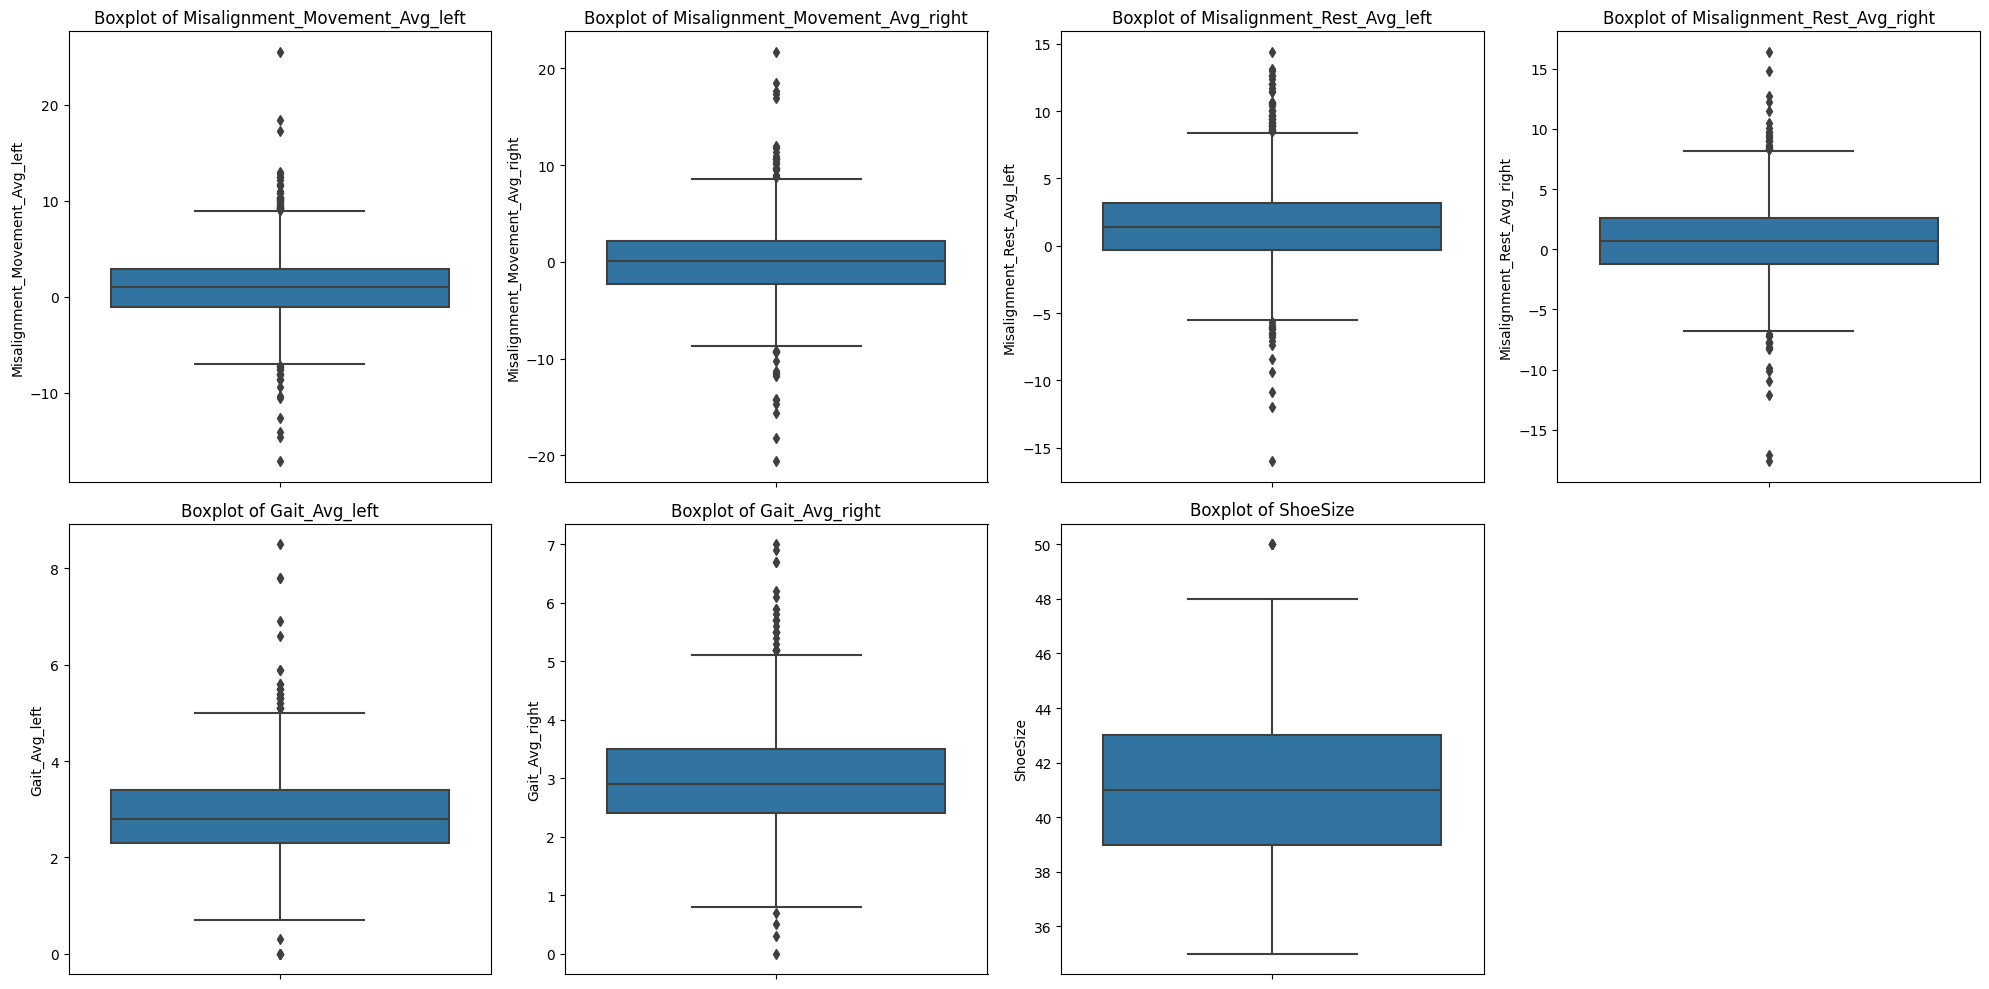

In [14]:
plot_boxplots_for_each_column(feature_data_clean)

#### 3.3. Boxplots for each feature without outliers 

In [15]:
feature_data_clean_no_outliers = feature_data_clean.drop(index=outlier_indices)
outlier_counts_no_outliers = count_outliers_per_column(feature_data_clean_no_outliers)
print(outlier_counts_no_outliers)

Misalignment_Movement_Avg_left     13
Misalignment_Movement_Avg_right     2
Misalignment_Rest_Avg_left         10
Misalignment_Rest_Avg_right        16
Gait_Avg_left                       0
Gait_Avg_right                      4
ShoeSize                            0
dtype: int64


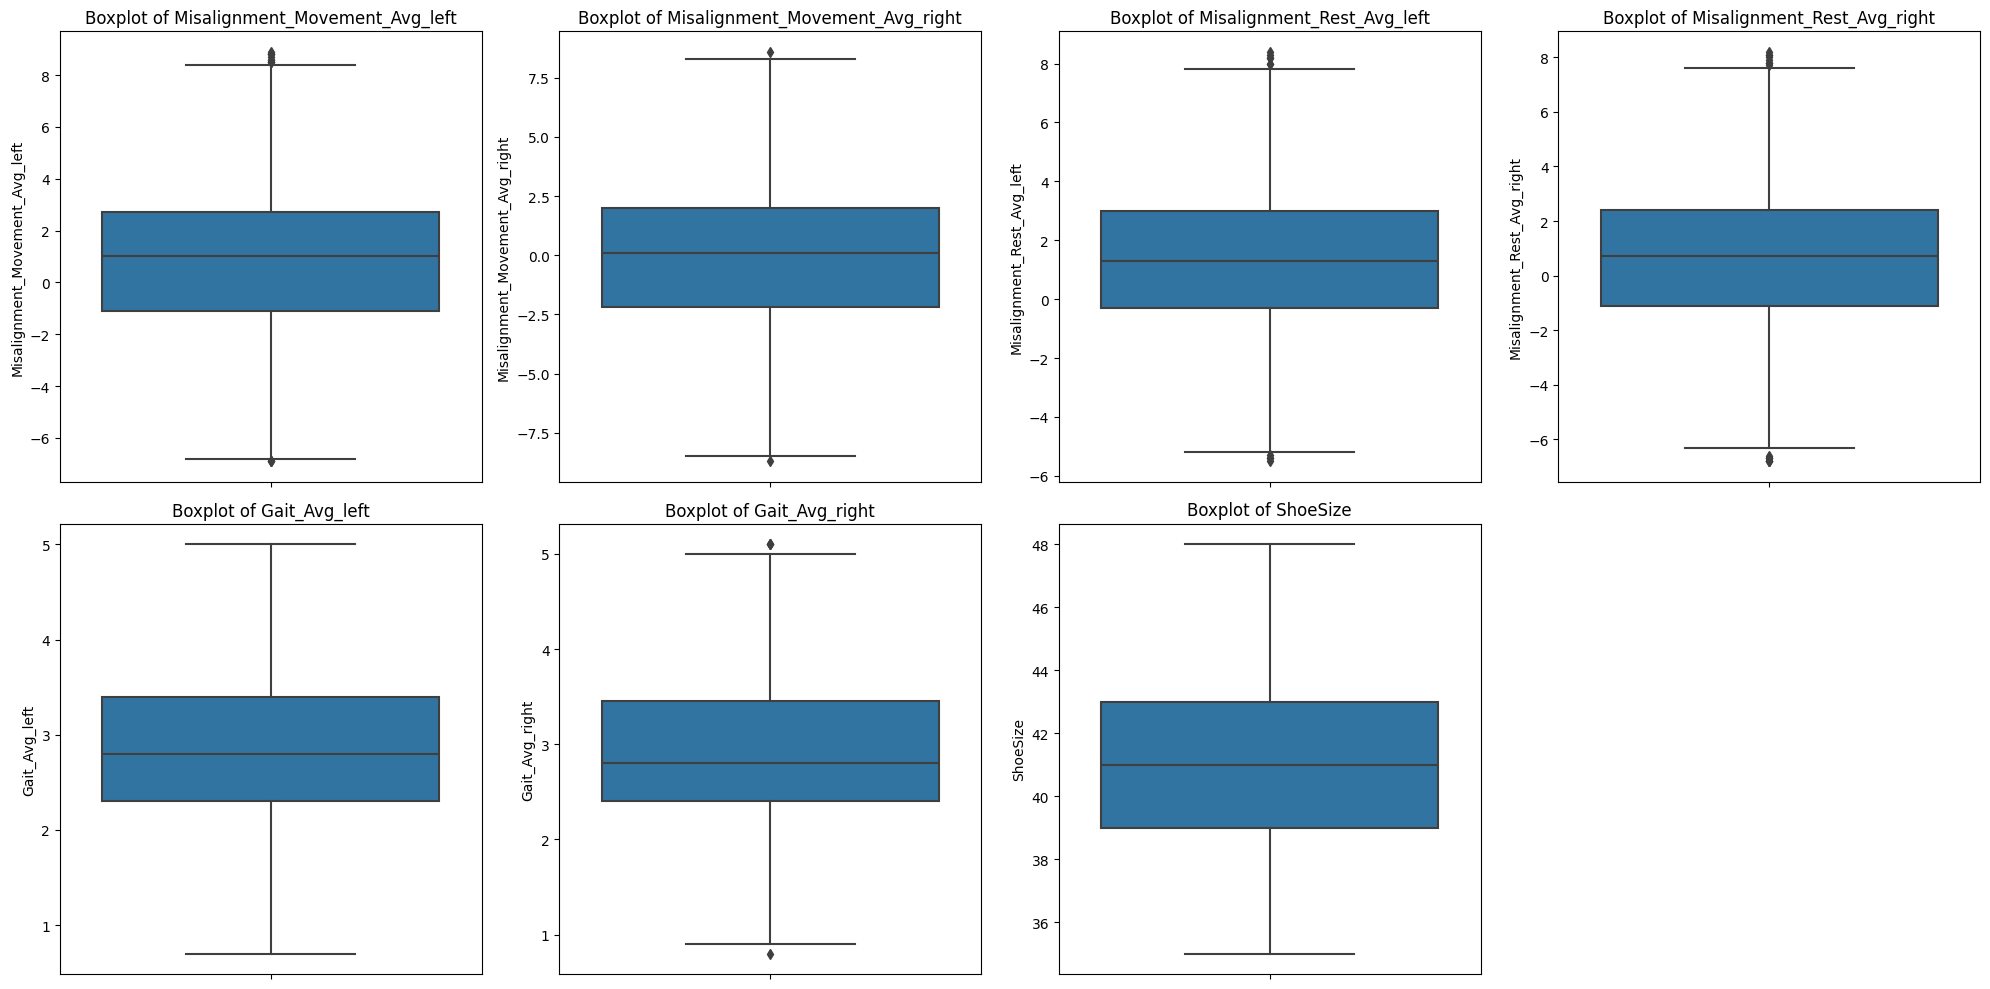

In [16]:
plot_boxplots_for_each_column(feature_data_clean_no_outliers) 

---

## 4. Inspect the correlation within target columns

- ordinal vs ordinal: Cramer's V
  - Cramer's V coefficient (Cramér's V)
    - measures the association between two nominal variables / also works for numeric variables vs nominal variables(n>2)

- Effect size (ES) Interpretation 
    - Range : 0 ~ 1
    - ES ≤ 0.2: The result is weak. Although the results are statistically significant, the fields are only weakly related.
    - 0.2 < ES ≤ 0.6: The result is appropriate. Fields are appropriately related.
    - ES > 0.6: The result is strong. Fields are strongly related.
  
- **Purpose of calculating correlation matrix of the target columns**
    - To find the best strategies to build models 
        - If the target columns are correlated with each other, it is better to use tree based models
        - If the binary target columns are not correlated with non-binary target columns, it is good to build a different model for binary and non-binary target columns 

In [17]:
# First create clean dataset
en_data_file_clean = en_data_file.dropna() 
target_data_clean = en_data_file_clean[target_columns]

#### 4.1. Define functions to calculate Cramer's V for all target columns, binary target columns, and non-binary target columns respectively

In [18]:
from scipy.stats import chi2_contingency
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Cramer's V value
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))


# Create Cramer's V correlation matrix for all target columns
def create_cramers_v_matrix(df, columns):
    n_cols = len(columns)
    cramer_matrix = np.zeros((n_cols, n_cols))
    
    for i in range(n_cols):
        for j in range(i, n_cols):
            cramer_matrix[i, j] = cramers_v(df[columns[i]], df[columns[j]])
            cramer_matrix[j, i] = cramer_matrix[i, j]
    
    return pd.DataFrame(cramer_matrix, index=columns, columns=columns)

# Create Cramer's V correlation matrix for binary and non-binary target columns
def create_cramers_v_matrix_binary_nonbinary(df, binary_columns, nonbinary_columns):
    n_binary = len(binary_columns)
    n_nonbinary = len(nonbinary_columns)
    cramer_matrix = np.zeros((n_binary, n_nonbinary))
    
    for i in range(n_binary):
        for j in range(n_nonbinary):
            cramer_matrix[i, j] = cramers_v(df[binary_columns[i]], df[nonbinary_columns[j]])
    
    return pd.DataFrame(cramer_matrix, index=binary_columns, columns=nonbinary_columns)

In [19]:
# Get Cramer's V correlation matrix for all target columns, binary target columns, and non-binary target columns

cramer_matrix_all_features = create_cramers_v_matrix(target_data_clean, target_columns)
cramer_matrix_binary_features = create_cramers_v_matrix(target_data_clean, binary_target_columns)
cramer_matrix_non_binary_features = create_cramers_v_matrix(target_data_clean, non_binary_target_columns)
cramer_matrix_binary_nonbinary_features = create_cramers_v_matrix_binary_nonbinary(
    target_data_clean, 
    binary_target_columns,
    non_binary_target_columns
)

#### 4.2. Plot the Cramer's V correlation matrix

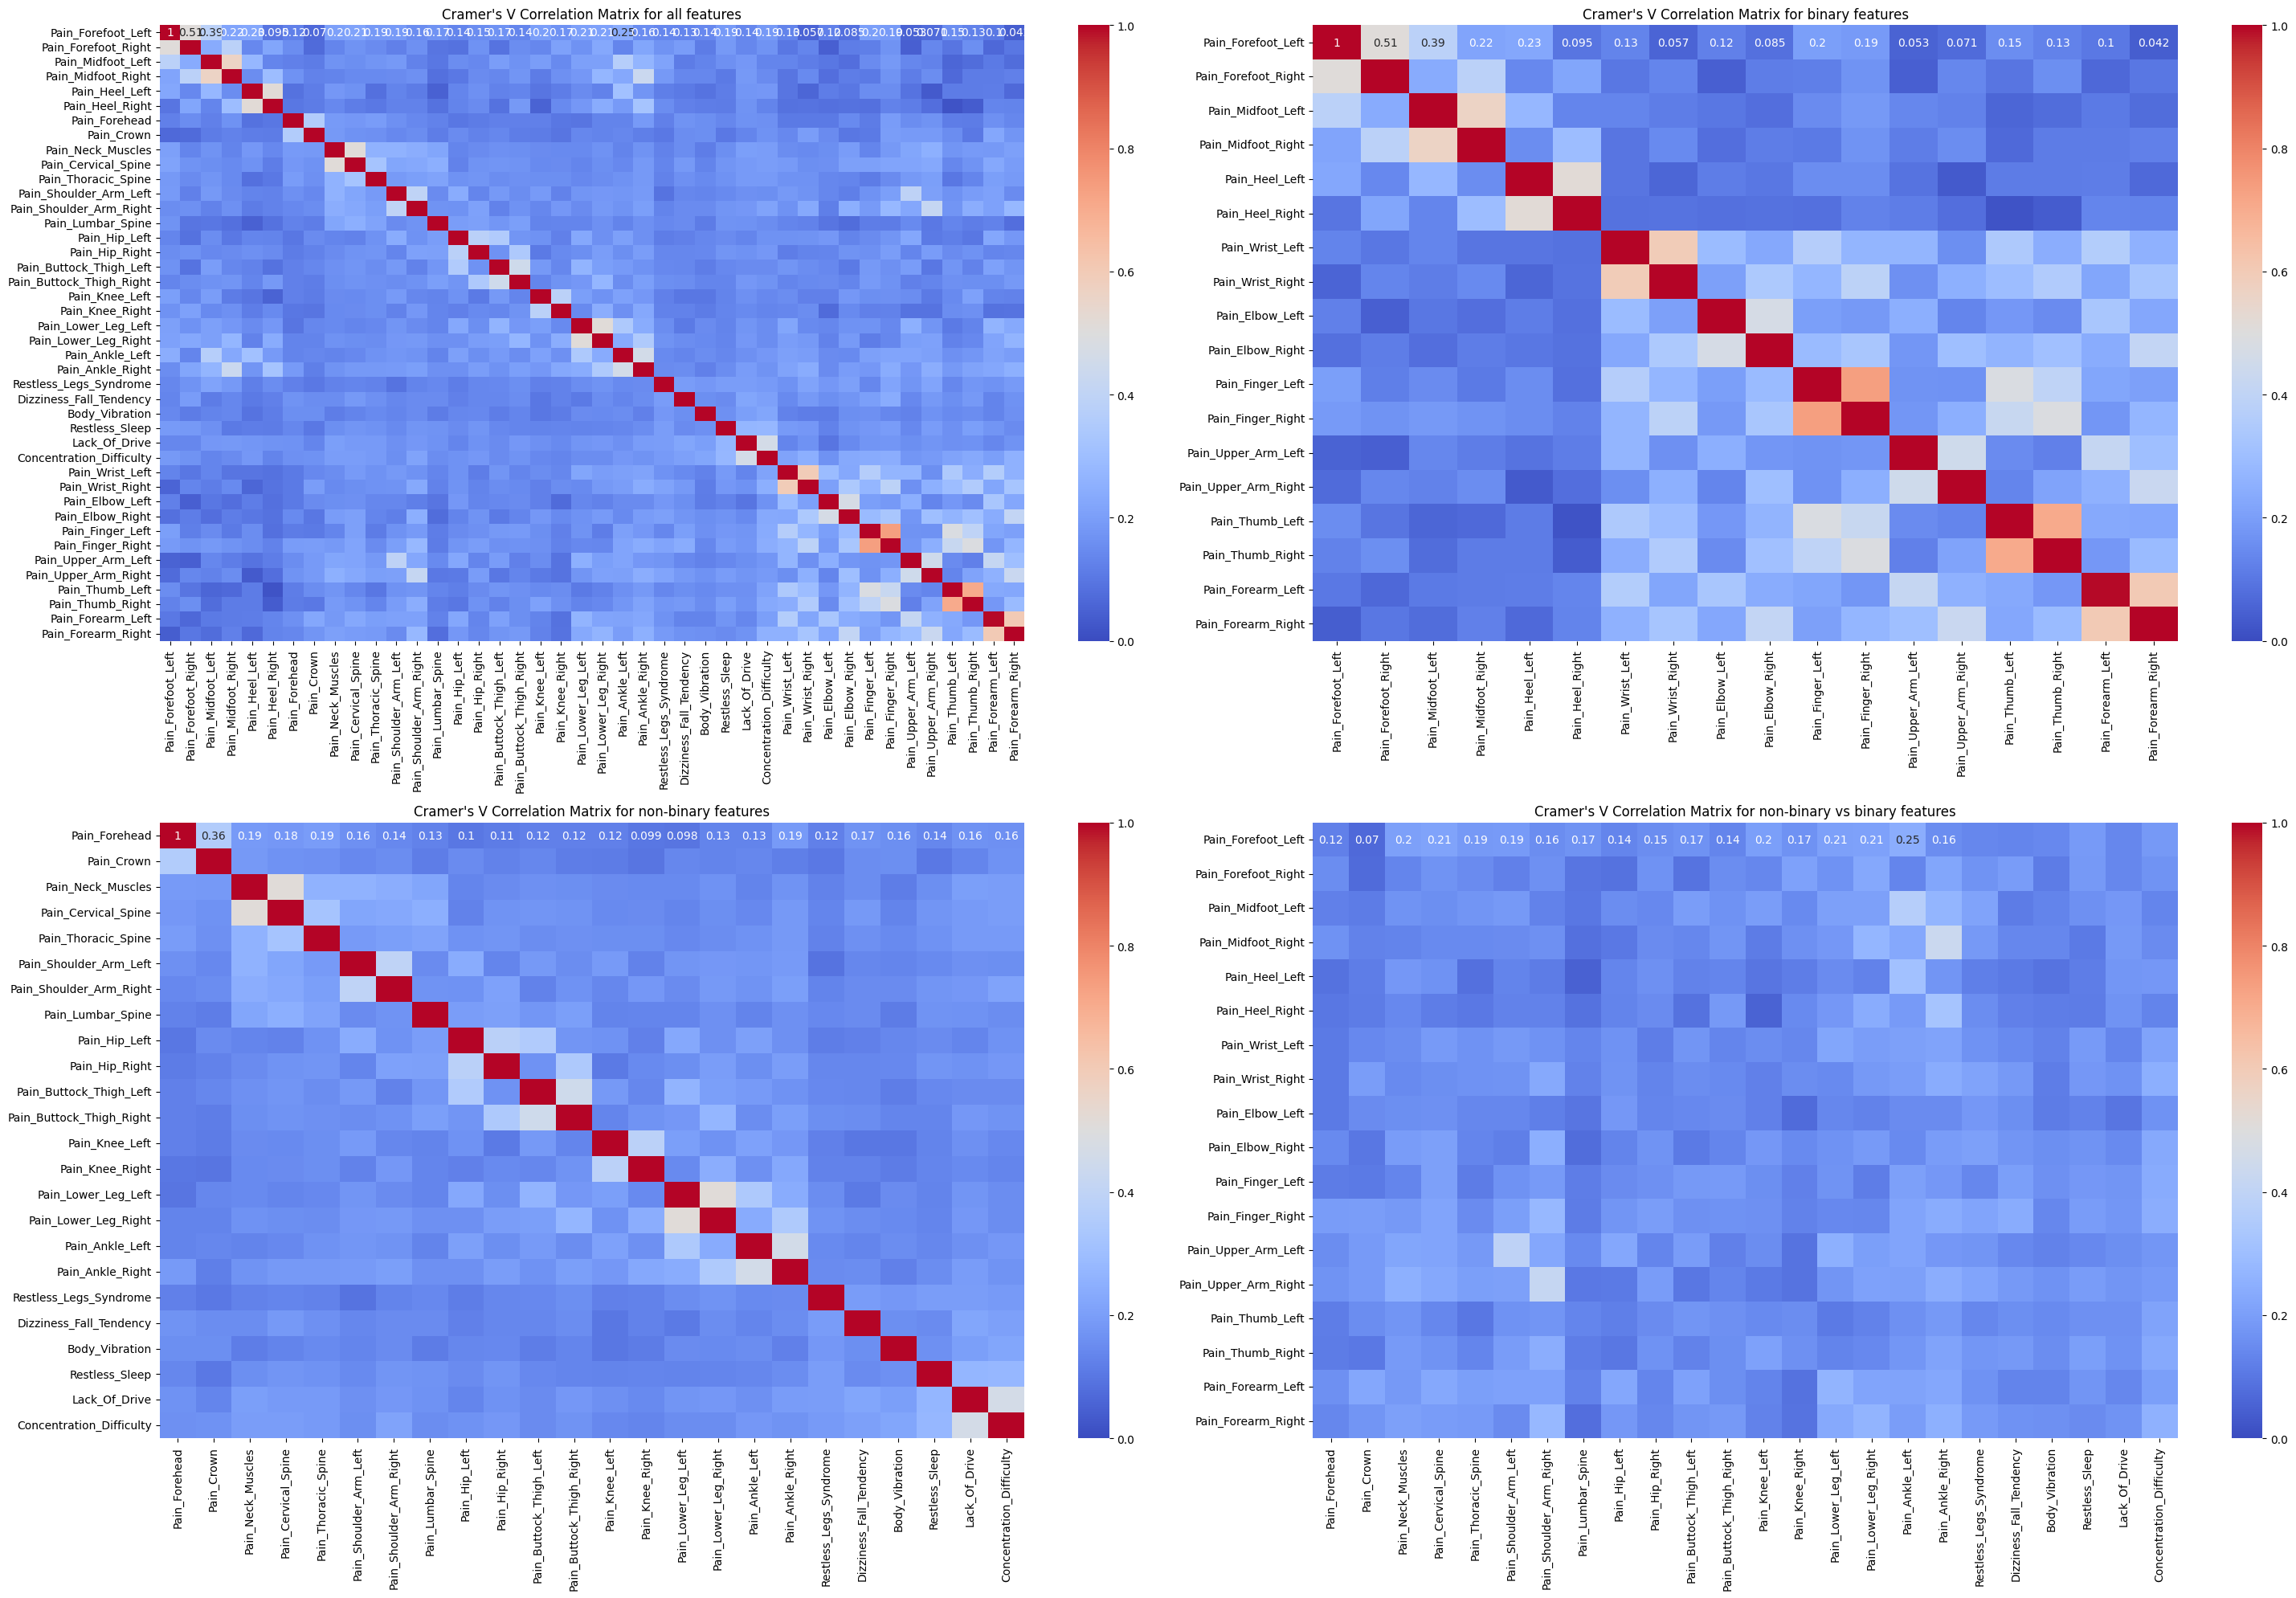

In [20]:
# Create a single row with 3 columns of subplots
plt.figure(figsize=(30, 20))  # Increased width, reduced height

# Plot first three heatmaps
plt.subplot(2, 2, 1)
sns.heatmap(cramer_matrix_all_features, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramer's V Correlation Matrix for all features")

plt.subplot(2, 2, 2)
sns.heatmap(cramer_matrix_binary_features, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramer's V Correlation Matrix for binary features")

plt.subplot(2, 2, 3)
sns.heatmap(cramer_matrix_non_binary_features, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramer's V Correlation Matrix for non-binary features")

plt.subplot(2, 2, 4)
sns.heatmap(cramer_matrix_binary_nonbinary_features, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramer's V Correlation Matrix for non-binary vs binary features")

plt.tight_layout()
plt.show()

#### 4.3. Inspect the high correlation pairs ( All target columns, binary target columns, non-binary target columns)

In [21]:
# Calculate the correlation between features and targets  using non-parametric correlation test 
def get_high_corr_pairs(data, threshold, binary_target_columns, non_binary_target_columns):
    # Calculate correlation matrix
    corr_matrix = data.corr()

    # Get pairs of features with correlation > threshold
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                # Get column names
                col1 = corr_matrix.columns[i]
                col2 = corr_matrix.columns[j]
                
                # Add prefixes based on column type
                col1_display = col1
                if col1 in binary_target_columns:
                    col1_display = f"bin_{col1}"
                elif col1 in non_binary_target_columns:
                    col1_display = f"no_bin_{col1}"
                    
                col2_display = col2
                if col2 in binary_target_columns:
                    col2_display = f"bin_{col2}"
                elif col2 in non_binary_target_columns:
                    col2_display = f"no_bin_{col2}"
                
                high_corr_pairs.append({
                    'feature1': col1_display,
                    'feature2': col2_display,
                    'correlation': corr_matrix.iloc[i,j]
                })

    # Only create DataFrame if there are high correlations
    if high_corr_pairs:
        high_corr_df = pd.DataFrame(high_corr_pairs)
        high_corr_df['abs_correlation'] = abs(high_corr_df['correlation'])
        high_corr_df = high_corr_df.sort_values('abs_correlation', ascending=False)
        high_corr_df = high_corr_df.drop('abs_correlation', axis=1)
        high_corr_df = high_corr_df.reset_index(drop=True)
        display(high_corr_df)
    else:
        print(f"No feature pairs found with correlation > {threshold}")
        
threshold = 0.6

In [22]:
print(f'cramer matrix for all target columns (threshold = {threshold}):')
get_high_corr_pairs(cramer_matrix_all_features, threshold, binary_target_columns, non_binary_target_columns)

cramer matrix for all target columns (threshold = 0.6):


feature1                     feature2  correlation
0         bin_Pain_Finger_Left        bin_Pain_Finger_Right     0.903010
1          bin_Pain_Thumb_Left         bin_Pain_Thumb_Right     0.901014
2          bin_Pain_Wrist_Left         bin_Pain_Wrist_Right     0.769600
3        bin_Pain_Forearm_Left       bin_Pain_Forearm_Right     0.767832
4        bin_Pain_Midfoot_Left       bin_Pain_Midfoot_Right     0.728448
5     no_bin_Pain_Neck_Muscles   no_bin_Pain_Cervical_Spine     0.695349
6         bin_Pain_Finger_Left          bin_Pain_Thumb_Left     0.687765
7           bin_Pain_Heel_Left          bin_Pain_Heel_Right     0.685396
8   no_bin_Pain_Lower_Leg_Left  no_bin_Pain_Lower_Leg_Right     0.673510
9        bin_Pain_Finger_Right         bin_Pain_Thumb_Right     0.672182
10      bin_Pain_Forefoot_Left      bin_Pain_Forefoot_Right     0.667939
11       bin_Pain_Finger_Right          bin_Pain_Thumb_Left     0.638627
12        bin_Pain_Finger_Left         bin_Pain_Thumb_Right     0.611947
13         bin_Pain_Elbow_Left         bin_Pain_Elbow_Right     0.605724

In [23]:
print(f'cramer matrix for binary target columns (threshold = {threshold}):')
get_high_corr_pairs(cramer_matrix_binary_features, threshold, binary_target_columns, non_binary_target_columns)

cramer matrix for binary target columns (threshold = 0.6):


feature1                 feature2  correlation
0    bin_Pain_Finger_Left    bin_Pain_Finger_Right     0.897118
1     bin_Pain_Thumb_Left     bin_Pain_Thumb_Right     0.893929
2   bin_Pain_Forearm_Left   bin_Pain_Forearm_Right     0.747573
3     bin_Pain_Wrist_Left     bin_Pain_Wrist_Right     0.740132
4   bin_Pain_Midfoot_Left   bin_Pain_Midfoot_Right     0.734683
5      bin_Pain_Heel_Left      bin_Pain_Heel_Right     0.692025
6  bin_Pain_Forefoot_Left  bin_Pain_Forefoot_Right     0.674530
7    bin_Pain_Finger_Left      bin_Pain_Thumb_Left     0.637938
8   bin_Pain_Finger_Right     bin_Pain_Thumb_Right     0.621087

In [24]:
print(f'cramer matrix for non-binary target columns (threshold = {threshold}):')
get_high_corr_pairs(cramer_matrix_non_binary_features, threshold, binary_target_columns, non_binary_target_columns)

cramer matrix for non-binary target columns (threshold = 0.6):


feature1                     feature2  correlation
0    no_bin_Pain_Neck_Muscles   no_bin_Pain_Cervical_Spine     0.688181
1  no_bin_Pain_Lower_Leg_Left  no_bin_Pain_Lower_Leg_Right     0.668852

#### 4.3. Inspect the high correlation pairs ( non-binary vs binary target columns)

In [25]:
def get_high_corr_pairs_binary_nonbinary(data, threshold, binary_target_columns, non_binary_target_columns):
    # data is already a correlation matrix between binary and non-binary columns
    high_corr_pairs = []
    
    # Iterate through all values in the matrix
    for i in range(len(data.index)):
        for j in range(len(data.columns)):
            if abs(data.iloc[i,j]) > threshold:
                # Get column names
                binary_col = data.index[i]      # row names are binary columns
                nonbinary_col = data.columns[j] # column names are non-binary columns
                
                high_corr_pairs.append({
                    'binary_feature': f"bin_{binary_col}",
                    'nonbinary_feature': f"no_bin_{nonbinary_col}",
                    'correlation': data.iloc[i,j]
                })

    # Only create DataFrame if there are high correlations
    if high_corr_pairs:
        high_corr_df = pd.DataFrame(high_corr_pairs)
        high_corr_df['abs_correlation'] = abs(high_corr_df['correlation'])
        high_corr_df = high_corr_df.sort_values('abs_correlation', ascending=False)
        high_corr_df = high_corr_df.drop('abs_correlation', axis=1)
        high_corr_df = high_corr_df.reset_index(drop=True)
        display(high_corr_df)
    else:
        print(f"No feature pairs found with correlation > {threshold}")

In [26]:
threshold = 0.6
print(f'cramer matrix for binary and non-binary target columns (threshold = {threshold}):')
get_high_corr_pairs_binary_nonbinary(
    cramer_matrix_binary_nonbinary_features, 
    threshold, 
    binary_target_columns, 
    non_binary_target_columns
)

cramer matrix for binary and non-binary target columns (threshold = 0.6):
No feature pairs found with correlation > 0.6


#### 4.4. Interpreting the results

- **1. Cramér's Matrix Analysis for All Target Columns**  
    - **Key Observations**  
        - Most relationships show high correlation values (0.6–0.9 or higher), suggesting strong associations between pain in corresponding contralateral (opposite side) body parts.  

    - **Highest Correlations**  
        - Pain_Finger_Left ↔ Pain_Finger_Right (0.903)  
        - Pain_Thumb_Left ↔ Pain_Thumb_Right (0.901)  
        - Pain_Wrist_Left ↔ Pain_Wrist_Right (0.769)  
        - Pain_Forearm_Left ↔ Pain_Forearm_Right (0.767)  
        - Pain_Midfoot_Left ↔ Pain_Midfoot_Right (0.728)  

    - **Interpretation**  
        - **Bilateral Pain Patterns**  
            - Pain in the fingers, thumbs, wrists, forearms, and midfoot shows high correlation between left and right sides.  
            - This correlation suggests that bilateral movement and repetitive activities may contribute to pain on both sides.  

        - **Notable Anatomical Relationships**  
            - **Neck Region**  
                - Pain_Neck_Muscles ↔ Pain_Cervical_Spine (0.695)  
                - Indicates a strong association between neck muscle pain and cervical spine issues.  

            - **Hand Region**  
                - Pain_Finger_Left ↔ Pain_Thumb_Left (0.687)  
                - Pain_Finger_Right ↔ Pain_Thumb_Right (0.672)  
                - Suggests finger pain may extend to the thumb, potentially indicating shared movement patterns.  



- **2. Cramér's Matrix Analysis for Binary Target Columns**  
    - **Key Observations**  
        - Pain_Finger_Left ↔ Pain_Finger_Right (0.897)  
        - Pain_Thumb_Left ↔ Pain_Thumb_Right (0.893)  
        - Pain_Forearm_Left ↔ Pain_Forearm_Right (0.747)  
        - Pain_Wrist_Left ↔ Pain_Wrist_Right (0.740)  

    - **Interpretation**  
        - Similar to the overall dataset, there is a strong correlation between pain in corresponding left and right body parts.  
        - The high correlation (0.6 and above) suggests that pain in one side significantly increases the likelihood of pain on the opposite side.  
        - This could indicate shared usage patterns, nerve pathways, or compensatory mechanisms.  



- **3. Cramér's Matrix Analysis for Non-Binary Target Columns**  
    - **Key Observations**  
        - **Neck Region**  
            - Pain_Neck_Muscles ↔ Pain_Cervical_Spine (0.688)  
            - Neck muscle pain is highly associated with cervical spine issues.  
            - The strong correlation suggests that neck muscle tension could be linked to cervical spine problems, such as disc issues or poor posture.  

        - **Lower Leg Region**  
            - Pain_Lower_Leg_Left ↔ Pain_Lower_Leg_Right (0.668)  
            - Pain in the lower leg is strongly associated between the left and right sides.  
            - This may indicate gait compensation, weight distribution issues, or biomechanical asymmetry.  

    - **Interpretation**  
        - **Neck Issues**: Neck muscle pain is likely related to cervical spine issues.  
            - Possible causes include disc herniation, poor posture, or muscle strain.  
        - **Lower Leg Pain**: Strong bilateral correlation.  
            - May result from compensatory movement, balance issues, or uneven weight distribution.  



- **4. Cramér's Matrix Analysis for Binary and Non-Binary Target Columns**  
    - No significant correlation between binary and non-binary target columns was found.  



- **5. Conclusion**  
    - binary target columns are correalted with each other, so are the non-binary target columns.  
    - However, the correlation between binary and non-binary target columns is not significant. 
    - **Strategy for the model building** 
        $\Longrightarrow$ Use two different tree-based models for binary and non-binary targets (different loss functions).  


## 5. Inspect the correlation between features (numeric) 
- Purpose 
    - To remove the redundant features(reduce the dimensionality of the features) 
    - Although the tree-based models are not sensitive to multicollinearity, it is still better to remove the redundant features
- Method
    - Calculating the correlation matrix of the features 
    - Compute PCA to see if PCs can reflect the original features and separate the classes well.
- Correlation matrix of features 
    - Pearson Correlation Coefficient is used to calculate the correlation between features ( numeric values )
    - Pearson Correlation Coefficient Interpretation ( absolute value )
        - 0.75 $\le$ |value| $\le$ 1.0 : Very strong correlation
        - 0.45 $\le$ |value| $\lt$ 0.75 : Moderate correlation
        - |value| $\lt$ 0.45 : Weak correlation

https://blog.naver.com/gksshdk8003/221073071921

In [27]:
# First create clean dataset
en_data_file_clean = en_data_file.dropna() 
feature_data_clean = en_data_file_clean[feature_columns]

#### 5.1. Define a Function to plot the Pearson Correlation Matrix for Feature Columns

/Users/jaeyeopchung/.pyenv/versions/test-en/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jaeyeopchung/.pyenv/versions/test-en/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jaeyeopchung/.pyenv/versions/test-en/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jaeyeopchung/.pyenv/versions/test-en/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning

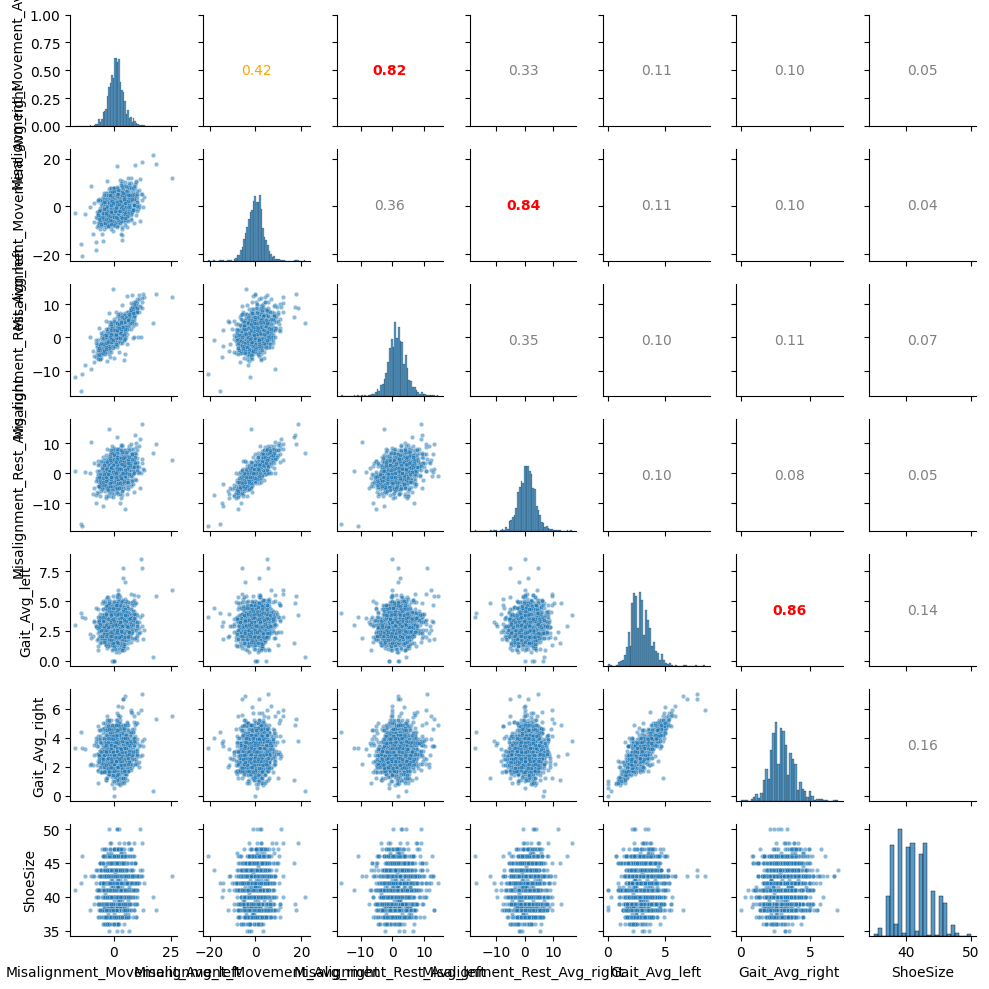

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_correlation_text(x, y, **kwargs):
    """Plot correlation text on the upper triangle of the PairGrid."""
    corr = x.corr(y)
    # Define text color based on correlation value
    if abs(corr) >= 0.7:
        color = 'red'  # Strong correlation
    elif abs(corr) >= 0.4:
        color = 'orange'  # Moderate correlation
    else:
        color = 'gray'  # Weak correlation
        
    plt.text(0.5, 0.5, f'{corr:.2f}', 
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=10,
             transform=plt.gca().transAxes, # center the text in subplots 
             color=color,
             weight='bold' if abs(corr) >= 0.7 else 'normal')


def seaborn_correlation_plot(data, plot_size=(10, 10)):
    """Create a PairGrid to visualize correlations with scatter plots, histograms, and correlation text."""
    # Handle infinite values by replacing them with NaN
    data = data.replace([np.inf, -np.inf], np.nan)
    
    # Create PairGrid with specified plot size
    g = sns.PairGrid(data, height=plot_size[0]/len(data.columns))
    
    # Lower triangle - scatter plots
    g.map_lower(sns.scatterplot, s=10, alpha=0.5)
    
    # Diagonal - histograms
    g.map_diag(sns.histplot)
    
    # Upper triangle - correlation values with colored text
    g.map_upper(plot_correlation_text)
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

# Call the function with your feature data and desired plot size
seaborn_correlation_plot(feature_data_clean, plot_size=(10, 10))

#### 5.2. Inspect the High Correlation Pairs within Features

In [29]:
def get_high_corr_pairs(data, threshold):
    # Calculate correlation matrix
    corr_matrix = data.corr()

    # Get pairs of features with correlation > threshold
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                
                high_corr_pairs.append({
                    'feature1': corr_matrix.columns[i],
                    'feature2': corr_matrix.columns[j],
                    'correlation': corr_matrix.iloc[i,j]
                })

    # Only create DataFrame if there are high correlations
    if high_corr_pairs:
        high_corr_df = pd.DataFrame(high_corr_pairs)
        high_corr_df['abs_correlation'] = abs(high_corr_df['correlation'])
        high_corr_df = high_corr_df.sort_values('abs_correlation', ascending=False)
        high_corr_df = high_corr_df.drop('abs_correlation', axis=1)
        high_corr_df = high_corr_df.reset_index(drop=True)
        display(high_corr_df)
    else:
        print(f"No feature pairs found with correlation > {threshold}")
    
    return high_corr_df

In [30]:
corr_matrix_features = feature_data_clean.corr()
threshold = 0.45

high_corr_features_df = get_high_corr_pairs(corr_matrix_features, threshold)

feature1                     feature2  correlation
0                     Gait_Avg_left               Gait_Avg_right     0.979440
1   Misalignment_Movement_Avg_right  Misalignment_Rest_Avg_right     0.968388
2    Misalignment_Movement_Avg_left   Misalignment_Rest_Avg_left     0.959840
3   Misalignment_Movement_Avg_right               Gait_Avg_right    -0.589936
4       Misalignment_Rest_Avg_right               Gait_Avg_right    -0.581892
5    Misalignment_Movement_Avg_left               Gait_Avg_right    -0.569669
6   Misalignment_Movement_Avg_right                Gait_Avg_left    -0.562141
7        Misalignment_Rest_Avg_left               Gait_Avg_right    -0.561836
8        Misalignment_Rest_Avg_left                Gait_Avg_left    -0.557954
9    Misalignment_Movement_Avg_left                Gait_Avg_left    -0.556925
10      Misalignment_Rest_Avg_right                Gait_Avg_left    -0.554673
11  Misalignment_Movement_Avg_right                     ShoeSize    -0.532953
12      Misalignment_Rest_Avg_right                     ShoeSize    -0.492993
13   Misalignment_Movement_Avg_left                     ShoeSize    -0.492373
14       Misalignment_Rest_Avg_left                     ShoeSize    -0.460619

#### 5.3. Inspect Multicollinearity within Features using VIF 
- Purpose : To remove the redundant features by detecting the features with high VIF 
- Method : VIF (Variance Inflation Factor) 
- Guidelines :
    - If VIF $\ge$ 10, serious multicollinearity exists -> the features should be considered for removal
    - If 10 $\gt$ VIF $\ge$ 5, moderate multicollinearity exists.
    - If VIF $\lt$ 5, no multicollinearity exists.  

https://del.oopy.io/ff0fea65-8ec2-41da-973a-5e004ebf1103


In [31]:
# 2. VIF Analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

# Calculate VIF
vif_results = calculate_vif(feature_data_clean)

# Display VIF results
print("\nVariance Inflation Factors:")
print(vif_results)


Variance Inflation Factors:
                           Feature        VIF
5                   Gait_Avg_right  49.660367
4                    Gait_Avg_left  47.232444
6                         ShoeSize  13.989684
2       Misalignment_Rest_Avg_left   4.153173
1  Misalignment_Movement_Avg_right   3.856352
3      Misalignment_Rest_Avg_right   3.846859
0   Misalignment_Movement_Avg_left   3.717294


In [32]:
# Calculate VIF without Gait_Avg_right(or Gait_Avg_left)
vif_results_without_Gait_Avg_right = calculate_vif(feature_data_clean.drop(columns=['Gait_Avg_right']))

# Display VIF results
print("\nVariance Inflation Factors without Gait_Avg_right Column:")
print(vif_results_without_Gait_Avg_right)


Variance Inflation Factors without Gait_Avg_right Column:
                           Feature        VIF
5                         ShoeSize  12.784640
4                    Gait_Avg_left  12.501077
2       Misalignment_Rest_Avg_left   4.128715
1  Misalignment_Movement_Avg_right   3.853327
3      Misalignment_Rest_Avg_right   3.842207
0   Misalignment_Movement_Avg_left   3.703392


In [33]:
# Calculate VIF without Gait_Avg_right(or Gait_Avg_left)
vif_results_without_Gait_Avg_right_and_left = calculate_vif(feature_data_clean.drop(columns=['Gait_Avg_right', 'Gait_Avg_left']))

# Display VIF results
print("\nVariance Inflation Factors without Gait_Avg_Right and Gait_Avg_Left Columns:")
print(vif_results_without_Gait_Avg_right_and_left)


Variance Inflation Factors without Gait_Avg_Right and Gait_Avg_Left Columns:
                           Feature       VIF
2       Misalignment_Rest_Avg_left  4.128444
1  Misalignment_Movement_Avg_right  3.849133
3      Misalignment_Rest_Avg_right  3.842095
0   Misalignment_Movement_Avg_left  3.699530
4                         ShoeSize  1.483893


In [34]:
# Calculate VIF without Gait_Avg_right(or Gait_Avg_left)
vif_results_without_ShoeSize = calculate_vif(feature_data_clean.drop(columns=['ShoeSize']))

# Display VIF results
print("\nVariance Inflation Factors without ShoeSize Column:")
print(vif_results_without_ShoeSize)


Variance Inflation Factors without ShoeSize Column:
                           Feature        VIF
5                   Gait_Avg_right  45.382718
4                    Gait_Avg_left  45.135378
2       Misalignment_Rest_Avg_left   4.127374
3      Misalignment_Rest_Avg_right   3.806176
1  Misalignment_Movement_Avg_right   3.779456
0   Misalignment_Movement_Avg_left   3.710377


In [35]:
vif_results_with_one_side = calculate_vif(feature_data_clean.drop(columns=['Gait_Avg_right', 'Misalignment_Rest_Avg_right', 'Misalignment_Movement_Avg_right']))

# Display VIF results
print("\nVariance Inflation Factors without Gait_Avg_right, Misalignment_Rest_Avg_right, Misalignment_Movement_Avg_right")
print(vif_results_with_one_side)


Variance Inflation Factors without Gait_Avg_right, Misalignment_Rest_Avg_right, Misalignment_Movement_Avg_right
                          Feature        VIF
3                        ShoeSize  12.523620
2                   Gait_Avg_left  12.445085
1      Misalignment_Rest_Avg_left   3.942403
0  Misalignment_Movement_Avg_left   3.376145


In [36]:
drop_columns = ['Gait_Avg_right', 'Gait_Avg_left', 'Misalignment_Rest_Avg_right', 'Misalignment_Rest_Avg_left']
vif_results_with_minimal_columns = calculate_vif(feature_data_clean.drop(columns=drop_columns))
vif_results_with_minimal_columns

Feature       VIF
0   Misalignment_Movement_Avg_left  1.313869
1  Misalignment_Movement_Avg_right  1.209188
2                         ShoeSize  1.105352

#### 5.4. Visualize the correlation matrix and VIF values

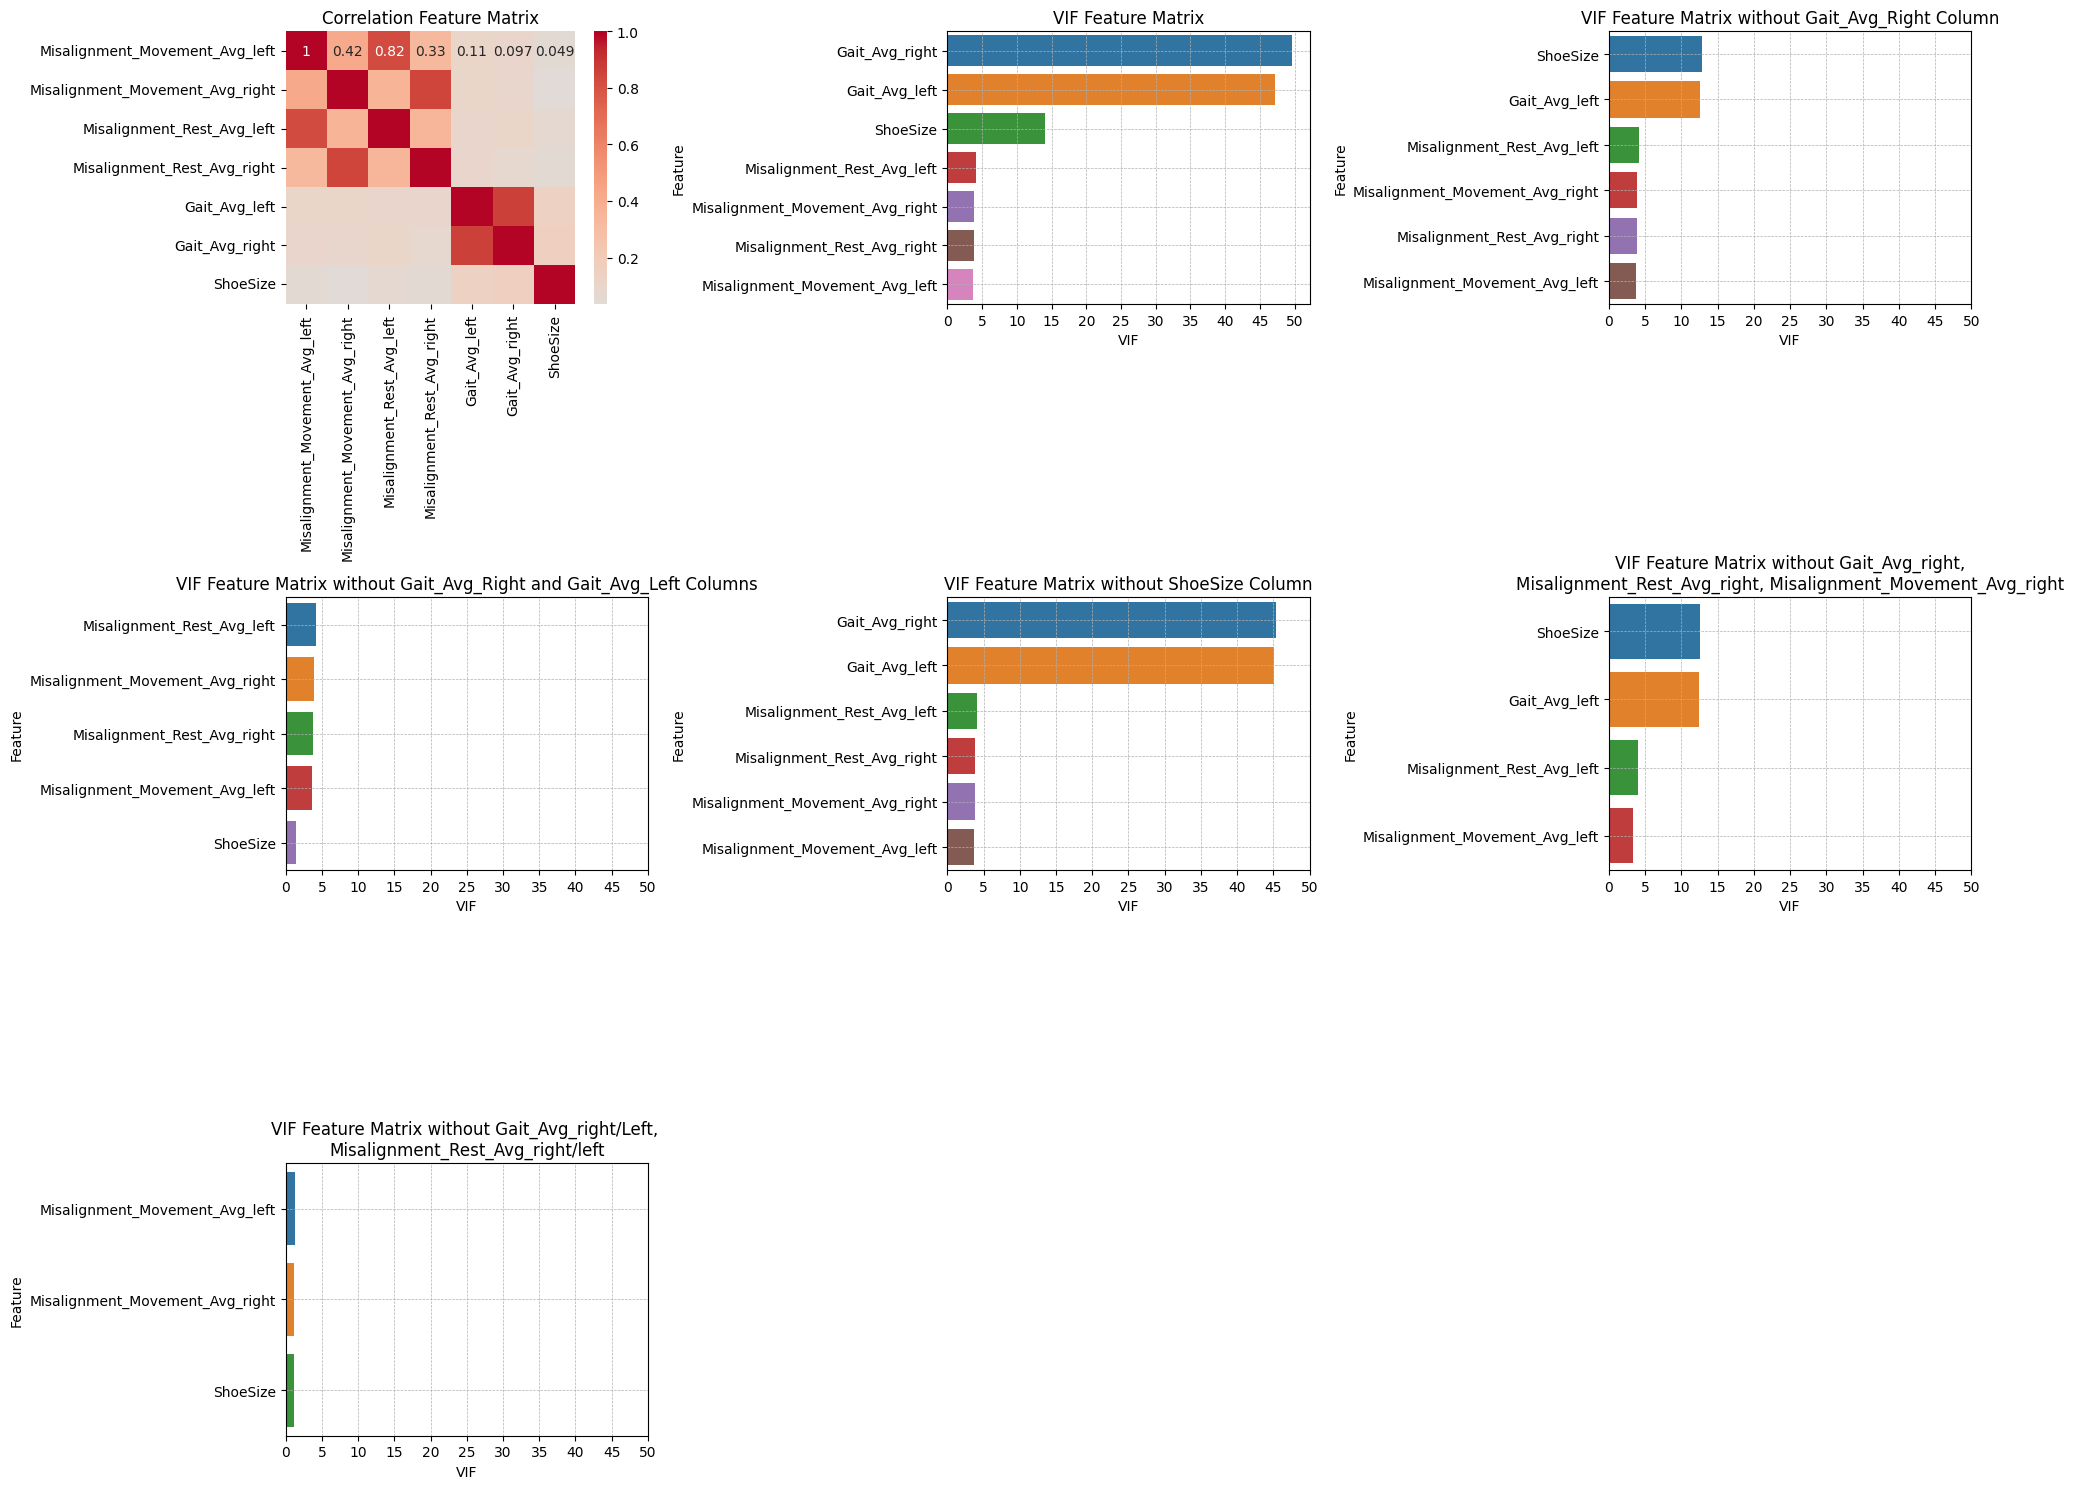

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_feature_matrix(corr_matrix_features, vif_results_list):
    num_plots = len(vif_results_list) + 1  # +1 for the correlation matrix plot
    n_cols = 3
    n_rows = (num_plots + n_cols - 1) // n_cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    # Plot the correlation matrix
    sns.heatmap(corr_matrix_features, annot=True, cmap='coolwarm', center=0, ax=axes[0])
    axes[0].set_title('Correlation Feature Matrix')

    # Plot VIF results
    titles = [
        'VIF Feature Matrix',
        'VIF Feature Matrix without Gait_Avg_Right Column',
        'VIF Feature Matrix without Gait_Avg_Right and Gait_Avg_Left Columns',
        'VIF Feature Matrix without ShoeSize Column',
        'VIF Feature Matrix without Gait_Avg_right,\nMisalignment_Rest_Avg_right, Misalignment_Movement_Avg_right',
        'VIF Feature Matrix without Gait_Avg_right/Left, \nMisalignment_Rest_Avg_right/left'
    ]

    for i, (vif_results, title) in enumerate(zip(vif_results_list, titles), start=1):
        sns.barplot(x='VIF', y='Feature', data=vif_results, ax=axes[i])
        axes[i].set_title(title)
        axes[i].grid(True, which='both', linestyle='--', linewidth=0.5)
        max_vif = max(vif_results['VIF'].max() for vif_results in vif_results_list)
        x_ticks = range(0, int(max_vif) + 5, 5)
        axes[i].set_xticks(x_ticks)

    # Hide any unused subplots
    for j in range(num_plots, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Example usage
vif_results_list = [
    vif_results,
    vif_results_without_Gait_Avg_right,
    vif_results_without_Gait_Avg_right_and_left,
    vif_results_without_ShoeSize,
    vif_results_with_one_side,
    vif_results_with_minimal_columns
]

plot_correlation_feature_matrix(corr_matrix_features, vif_results_list)

- Probably use columns 4th and 7th 

#### 5.5. Observation for Correlation Matrix and VIF values 
- Correlation Inspection 
    - Strongly correlated features ( |value| $\ge$ 0.75 ) : 
        - Gait_Avg_left ↔ Gait_Avg_right (0.979)
        - isalignment_Movement_Avg_right ↔ Misalignment_Rest_Avg_right (0.968)
        - isalignment_Movement_Avg_left ↔ Misalignment_Rest_Avg_left (0.960)
    - Moderate correlated features ( 0.45 $\le$ |value| $\lt$ 0.75 ) : 
        - Misalignment_Movement_Avg_right ↔ Gait_Avg_right (-0.590)
        - Misalignment_Rest_Avg_right ↔ Gait_Avg_right (-0.582)
        - Misalignment_Movement_Avg_left ↔ Gait_Avg_right (-0.570)
        - Misalignment_Movement_Avg_right ↔ Gait_Avg_left (-0.562)
        - Misalignment_Rest_Avg_left ↔ Gait_Avg_right (-0.562)
        - Misalignment_Rest_Avg_left ↔ Gait_Avg_left (-0.558)
        - Misalignment_Movement_Avg_left ↔ Gait_Avg_left (-0.557)
        - Misalignment_Rest_Avg_right ↔ Gait_Avg_left (-0.555)
        - Misalignment_Movement_Avg_right ↔ ShoeSize (-0.533)
        - Misalignment_Rest_Avg_right ↔ ShoeSize (-0.493)
        - Misalignment_Movement_Avg_left ↔ ShoeSize (-0.492)
        - Misalignment_Rest_Avg_left ↔ ShoeSize (-0.461)

- VIF Inspection
    - Very High VIF values :
        - Gait_Avg_right, Gait_Avg_left, ShoeSize 
    - Moderate VIF values :
        - Misalignment_Rest_Avg_left, Misalignment_MOvement_Avg_Left ( $\approx$ 5 )
        - Misalignment_Rest_Avg_right, Misalignment_Movement_Avg_right ( $\approx$ 5 )
    - Removing Gait_Avg_right and Gait_Avg_left, the VIF values for features decrease significantly 
        - This means that **Gait_Avg_right** and **Gait_Avg_left** can be inferred from other features $\Longrightarrow$ remove them
    

- Conclusion 
    - Remove **Gait_Avg_right** and **Gait_Avg_left** 
    - Consider **Misalignment_Rest_Avg_left/Right** and **Misalignment_Movement_Avg_left/Right** for removal or modification
        - Possibly some derived features from these features, such as the difference between highly correlated features or mean value of highly correlated features. 


[Why high correlation coefficient doesn't guarantee high VIF?](https://stats.stackexchange.com/questions/445189/why-high-correlation-coefficient-doesnt-guarantee-high-vif)

#### 5.6. PCA for feature columns 
- Purpose : To see if PCs can reflect the original features, thus reducing the dimensionality of the features  

- Procedure : 
    - ShoeSize is considered as an oridnal value 
    - Normalize the feature data to N(0,1)
    - Compute PCA
    - Plot the scree plot and cumulative explained variance ratio
    - Select the number of PCs based on the scree plot and cumulative explained variance ratio 
     
- Guidelines for selecting the number of principal components:
    - Cumulative Explained Variance Criteria
        - 80% - 90%: Commonly used to achieve good dimensionality reduction while preserving key information
        - 95% or higher: Used when minimal information loss is desired
        - 70% or lower: May be considered when data is very high-dimensional and noisy
    - Scree Plot Analysis
        - Look for the "elbow point" where eigenvalues start leveling off after a sharp decline
        - Components after this point contribute less information and can often be discarded

- Caveat
    - PCA does not consider class labels. If it does not clearly separate the classes, using PCs is not a suitable.  
    - PCA is sensitive to outliers.

https://medium.com/towards-data-science/visualising-the-classification-power-of-data-54f5273f640 
https://huidea.tistory.com/44

##### 5.6.1. Define PCA and Get the PCA Result Matrix

In [38]:
feature_columns

['Misalignment_Movement_Avg_left',
 'Misalignment_Movement_Avg_right',
 'Misalignment_Rest_Avg_left',
 'Misalignment_Rest_Avg_right',
 'Gait_Avg_left',
 'Gait_Avg_right',
 'ShoeSize']

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
import numpy as np 

# First create clean dataset
en_data_file_clean = en_data_file.dropna() 

# Choose data 
# feature_data_clean = en_data_file_clean[feature_columns].drop(columns=['Gait_Avg_right', 'Gait_Avg_left'])
feature_data_clean = en_data_file_clean[feature_columns].drop(columns=['Gait_Avg_right', 'Gait_Avg_left', 'Misalignment_Rest_Avg_left', 'Misalignment_Rest_Avg_right'])
# feature_data_clean = en_data_file_clean[feature_columns]

# Normalize the feature data to N(0,1)
scaler = StandardScaler() 
scaled_feature_data = scaler.fit_transform(feature_data_clean)

In [40]:
# Adjust the number of components to be the minimum of the number of samples and features

# Create PCA with clean data
pca = PCA(n_components=len(feature_data_clean.columns))
pca_transformed = pca.fit_transform(scaled_feature_data)

# Ensure the index matches the number of rows in the transformed data
pca_df = pd.DataFrame(
    pca_transformed, 
    index=range(pca_transformed.shape[0]),  # Use a range index to match the number of rows
    columns=[f'PC{i+1}' for i in range(len(feature_data_clean.columns))]
)

pca_df

PC1       PC2       PC3
0     0.131632 -1.562407 -0.480962
1     0.011821 -1.546364 -0.524068
2     0.744437  1.782371  0.166251
3    -2.319735  1.449143 -0.234395
4    -1.380260  1.341523  0.909038
...        ...       ...       ...
1961  0.915811 -0.892283  0.498971
1962  0.309552 -0.817361  0.003572
1963 -1.612435 -0.932212 -0.356836
1964 -0.133316 -1.146369 -0.537674
1965 -1.850860  0.308459  2.644051

[1966 rows x 3 columns]

##### 5.6.2. Plot the Scree Plot and Get the Number of Components to Keep

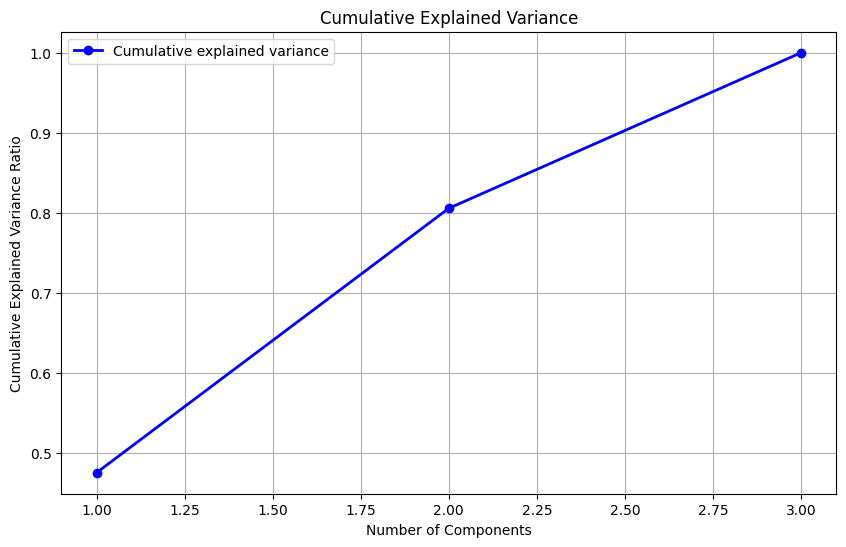

Number of components needed for 60.0% explained variance: 2
PC1: 0.4750 (47.5%)
PC2: 0.8055 (80.6%)
PC3: 1.0000 (100.0%)


In [41]:
def plot_scree_and_get_n_components(pca, threshold=0.6):
    # Calculate cumulative explained variance ratio
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    
    # Find number of components needed for threshold
    n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1
    
    # Create figure
    plt.figure(figsize=(10, 6))
    
    # Plot cumulative explained variance ratio
    plt.plot(range(1, len(cumulative_variance_ratio) + 1),
             cumulative_variance_ratio,
             'bo-', linewidth=2, label='Cumulative explained variance')
    
    
    plt.title('Cumulative Explained Variance')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Number of components needed for {threshold*100}% explained variance: {n_components}")
    for i, var in enumerate(cumulative_variance_ratio, 1):
        print(f"PC{i}: {var:.4f} ({var*100:.1f}%)")

plot_scree_and_get_n_components(pca)

##### 5.6.3 Define a function to visualize PCA in 3D

In [42]:
import plotly.graph_objects as go
import plotly.express as px

# Create a 3D scatter plot of PCA components colored by target values.
def plot_3d_pca(pca_df, target_data, target_column, pc_x='PC1', pc_y='PC2', pc_z='PC3', width=800, height=500):
    
    # Ensure inputs are DataFrames
    if not isinstance(pca_df, pd.DataFrame) or not isinstance(target_data, pd.DataFrame):
        raise ValueError("Both pca_df and target_data must be pandas DataFrames.")
    
    # Check if the required columns exist in the dataframes
    if not all(col in pca_df.columns for col in [pc_x, pc_y, pc_z]):
        raise ValueError(f"One or more of the specified PCA columns ({pc_x}, {pc_y}, {pc_z}) are not in pca_df.")
    
    if target_column not in target_data.columns:
        raise ValueError(f"The target column '{target_column}' is not in target_data.")
    
    # Reset indices to ensure alignment
    pca_df = pca_df.reset_index(drop=True)
    target_data = target_data.reset_index(drop=True)
    
    # Create the 3D scatter plot
    fig = go.Figure()
    
    # Get unique target values
    targets = sorted(target_data[target_column].unique())
    
    # Generate colors dynamically based on number of targets
    if len(targets) <= 10:
        colors = px.colors.qualitative.Set1[:len(targets)]  # Using Plotly's built-in color sequences
    else:
        colors = px.colors.qualitative.Light24[:len(targets)]  # Use a larger color palette if more than 10 targets
    
    # Create scatter plot for each target value
    for target, color in zip(targets, colors):
        indices_to_keep = target_data[target_column] == target
        
        # Skip if no data points match the target
        if not indices_to_keep.any():
            print(f"No data points found for target {target}. Skipping.")
            continue
        
        fig.add_trace(go.Scatter3d(
            x=pca_df.loc[indices_to_keep, pc_x],
            y=pca_df.loc[indices_to_keep, pc_y],
            z=pca_df.loc[indices_to_keep, pc_z],
            mode='markers',
            marker=dict(size=5, color=color),
            name=f'Target {target}'
        ))
    
    # Update layout
    fig.update_layout(
        title=f'3D PCA of Feature Columns (colored by {target_column})',
        scene=dict(
            xaxis_title=f'Principal Component {pc_x[-1]}',
            yaxis_title=f'Principal Component {pc_y[-1]}',
            zaxis_title=f'Principal Component {pc_z[-1]}'
        ),
        width=width,
        height=height,
        margin=dict(l=0, r=0, b=0, t=30)  # Adjust margins for better layout
    )
    
    fig.show()

**PCA with outliers**

In [75]:
# Change the target columns(index) to different CPA results for each target column
# plot_3d_pca(pca_df, en_data_file_clean, non_binary_target_columns[2], pc_x='PC1', pc_y='PC2', pc_z='PC3')
plot_3d_pca(pca_df, en_data_file_clean, binary_target_columns[7], pc_x='PC1', pc_y='PC2', pc_z='PC3')

**PCA without outliers**


In [44]:
# Adjust the number of components to be the minimum of the number of samples and features

# Remove outliers
outlier_indices = get_outlier_indices(feature_data_clean)
feature_data_clean_no_outliers = feature_data_clean.drop(index=outlier_indices)

# Create PCA with clean data without outliers
pca = PCA(n_components=len(feature_data_clean_no_outliers.columns))
scaled_feature_data_no_outliers = scaler.fit_transform(feature_data_clean_no_outliers)

# Ensure the index matches the number of rows in the transformed data
pca_df = pd.DataFrame(
    pca_transformed, 
    index=range(pca_transformed.shape[0]),  # Use a range index to match the number of rows
    columns=[f'PC{i+1}' for i in range(len(feature_data_clean.columns))]
)

In [45]:
# Change the target columns(index) to different CPA results for each target column
plot_3d_pca(pca_df, en_data_file_clean, non_binary_target_columns[15], pc_x='PC1', pc_y='PC2', pc_z='PC3')
# plot_3d_pca(pca_df, en_data_file_clean, binary_target_columns[2], pc_x='PC1', pc_y='PC2', pc_z='PC3')

##### 5.6.4 PCA Result 
- PCs don't separate the classes effectively, thus don't give a good representation of the original features. 

---

## 6. Correlation between features and targets 
- Guideliens : 
    - Association Analysis
        - Point-Biserial Correlation Coefficient ( continuous data - dichotomous data/binary category ) : Feature Columns(except for ShoeSize) vs True/False Targets  
            - measures the correlation between a numeric variable and a binary variable
            - coefficient range : -1 ~ 1 
            - coefficient interpretation 
                - absolute valeu $\ge$ 0.6 : strong correlation 
                - 0.6 $\gt$ absolute value $\ge$ 0.3 : moderate correlation 
                - 0.3 $\gt$ absolute value $\ge$ 0 : weak correlation 
        - Kendall's Tau($\tau$) rank correlation coefficient ( continuous data - ordinal data & ordinal data/discrete data - ordinal data ) : Feature Columns(except for ShoeSize) vs Pain Severity(0~5) & ShoeSize(discrete) vs Pain Severity(0~5)
            - Rank based, non-parametric correlation coefficient
            - coefficient range : -1 ~ 1 
            - coefficient interpretation 
                - |$\tau$| $\ge$ 0.3 : meaningful relation 
                - |$\tau$| $\ge$ 0.5 : strong relation 


Measure of Association ( Text Book ) : https://journals.sagepub.com/doi/pdf/10.1177/8756479308317006   
https://stats.stackexchange.com/questions/73065/correlation-coefficient-between-a-non-dichotomous-nominal-variable-and-a-numer    


#### 6.1. Define Functions for Correlation Analysis between features and targets

In [46]:
#### Correlation between features and targets 
# Since the feature columns are not perfectly normally distributed, the non-parametric correlation test is used.

# Point-Biserial Correlation for binary targets
from scipy import stats

def calculate_point_biserial_correlations(features, binary_targets):
    correlations = {}
    for target_col in binary_targets.columns:
        for feature_col in features.columns:
            correlation, p_value = stats.pointbiserialr(binary_targets[target_col], features[feature_col])
            correlations[(feature_col, target_col)] = {
                'correlation': correlation,
                'p_value': p_value
            }
    
    # Convert to DataFrame
    corr_df = pd.DataFrame([
        {
            'Feature': feat,
            'Target': targ,
            'Correlation': val['correlation'],
            'P-value': val['p_value']
        }
        for (feat, targ), val in correlations.items()
    ])
    
    # Sort by absolute correlation
    corr_df['Abs_Correlation'] = abs(corr_df['Correlation'])
    corr_df = corr_df.sort_values('Abs_Correlation', ascending=False)
    corr_df = corr_df.drop('Abs_Correlation', axis=1)
    
    return corr_df

def calculate_kendall_tau(features, binary_targets):
    results = []
    for target_col in binary_targets.columns:
        for feature_col in features.columns:
            tau, p_value = stats.kendalltau(features[feature_col], binary_targets[target_col])
            results.append({
                'Feature': feature_col, 
                'Target': target_col,
                'Tau': tau,
                'p-value': p_value
            })
    return pd.DataFrame(results).sort_values('Tau', ascending=False)


#### 6.2. Inspect the correlation results ( outliers not removed )  
- Purpose : To see if the there are meaningful associations between features and targets 
- Observation : No meaningful associations between features and targets are found based on the absolute coefficient values

In [47]:
p_biserial_result = calculate_point_biserial_correlations(
    en_data_file_clean[feature_columns],
    en_data_file_clean[binary_target_columns]
).reset_index(drop=True)

k_tau_result = calculate_kendall_tau(
    en_data_file_clean[feature_columns],
    en_data_file_clean[binary_target_columns]
).reset_index(drop=True)


In [48]:
p_biserial_result.head()

Feature                Target  Correlation       P-value
0  ShoeSize      Pain_Thumb_Right    -0.148436  3.738955e-11
1  ShoeSize  Pain_Upper_Arm_Right    -0.123092  4.370206e-08
2  ShoeSize     Pain_Finger_Right    -0.115425  2.869755e-07
3  ShoeSize       Pain_Thumb_Left    -0.100649  7.776543e-06
4  ShoeSize   Pain_Upper_Arm_Left    -0.092239  4.203693e-05

In [49]:
# No meaningful correlation 
p_biserial_result[(abs(p_biserial_result['Correlation']) > 0.45)]

Empty DataFrame
Columns: [Feature, Target, Correlation, P-value]
Index: []

In [50]:
# No meaningful correlation and statistically no correlation 
p_biserial_result[(abs(p_biserial_result['Correlation']) > 0.45) | p_biserial_result['P-value'] < 0.05]

Empty DataFrame
Columns: [Feature, Target, Correlation, P-value]
Index: []

In [51]:
k_tau_result.head()

Feature                Target       Tau   p-value
0       Misalignment_Rest_Avg_left      Pain_Thumb_Right  0.054672  0.003158
1   Misalignment_Movement_Avg_left      Pain_Thumb_Right  0.053234  0.004025
2                    Gait_Avg_left    Pain_Forearm_Right  0.052345  0.005209
3   Misalignment_Movement_Avg_left       Pain_Thumb_Left  0.034900  0.059346
4  Misalignment_Movement_Avg_right  Pain_Upper_Arm_Right  0.033543  0.069858

In [52]:
# No meaningful correlation 
k_tau_result[(abs(k_tau_result['Tau']) > 0.45)]

Empty DataFrame
Columns: [Feature, Target, Tau, p-value]
Index: []

In [53]:
# statistically meaningful but no actual effect on the target columns ( tau very small )
k_tau_result[(abs(k_tau_result['Tau']) > 0.45) | (p_biserial_result['P-value'] < 0.05)]

Feature                Target       Tau   p-value
0        Misalignment_Rest_Avg_left      Pain_Thumb_Right  0.054672  0.003158
1    Misalignment_Movement_Avg_left      Pain_Thumb_Right  0.053234  0.004025
2                     Gait_Avg_left    Pain_Forearm_Right  0.052345  0.005209
3    Misalignment_Movement_Avg_left       Pain_Thumb_Left  0.034900  0.059346
4   Misalignment_Movement_Avg_right  Pain_Upper_Arm_Right  0.033543  0.069858
5        Misalignment_Rest_Avg_left      Pain_Wrist_Right  0.029529  0.110845
6        Misalignment_Rest_Avg_left       Pain_Thumb_Left  0.025059  0.176050
7                    Gait_Avg_right    Pain_Forearm_Right  0.024962  0.182723
8       Misalignment_Rest_Avg_right  Pain_Upper_Arm_Right  0.023259  0.209028
9    Misalignment_Movement_Avg_left      Pain_Wrist_Right  0.022401  0.226173
10      Misalignment_Rest_Avg_right    Pain_Midfoot_Right  0.022355  0.227278
11                    Gait_Avg_left       Pain_Elbow_Left  0.021097  0.260162
12       Misalignment_Rest_Avg_left      Pain_Elbow_Right  0.018563  0.316210
13                   Gait_Avg_right       Pain_Elbow_Left  0.015990  0.393376
14                         ShoeSize    Pain_Midfoot_Right  0.014010  0.467936
15   Misalignment_Movement_Avg_left      Pain_Elbow_Right  0.013870  0.453635
16  Misalignment_Movement_Avg_right     Pain_Midfoot_Left  0.013628  0.461399
17      Misalignment_Rest_Avg_right     Pain_Midfoot_Left  0.012960  0.483929
18  Misalignment_Movement_Avg_right   Pain_Forefoot_Right  0.012925  0.484840
19                   Gait_Avg_right        Pain_Heel_Left  0.012916  0.490560
20       Misalignment_Rest_Avg_left    Pain_Forearm_Right  0.010720  0.562717
21                    Gait_Avg_left      Pain_Elbow_Right  0.008994  0.631183
22  Misalignment_Movement_Avg_right      Pain_Thumb_Right  0.008036  0.664054
23   Misalignment_Movement_Avg_left   Pain_Forefoot_Right  0.007023  0.704339
24      Misalignment_Rest_Avg_right       Pain_Heel_Right  0.005606  0.762047
25   Misalignment_Movement_Avg_left    Pain_Forearm_Right  0.005531  0.765078
26   Misalignment_Movement_Avg_left       Pain_Elbow_Left  0.005324  0.773606
27      Misalignment_Rest_Avg_right   Pain_Forefoot_Right  0.005219  0.778033
28  Misalignment_Movement_Avg_right    Pain_Forearm_Right  0.003222  0.861756
29                   Gait_Avg_right       Pain_Heel_Right  0.002702  0.885313
30   Misalignment_Movement_Avg_left  Pain_Upper_Arm_Right  0.002647  0.886282
31   Misalignment_Movement_Avg_left     Pain_Finger_Right  0.002589  0.888755
32       Misalignment_Rest_Avg_left  Pain_Upper_Arm_Right  0.002406  0.896627
33      Misalignment_Rest_Avg_right    Pain_Forearm_Right  0.002056  0.911581
34       Misalignment_Rest_Avg_left       Pain_Elbow_Left  0.002000  0.913998
35                    Gait_Avg_left       Pain_Heel_Right  0.000421  0.982084

#### 6.3. Inspect the correlation results ( without outliers )  
- Purpose : To see if the there are meaningful associations between features and targets after removing outliers
- Observation : No meaningful associations between features and targets are found based on the absolute coefficient values

In [54]:
outlier_indices = get_outlier_indices(en_data_file_clean[feature_columns])
en_data_file_clean_no_outliers = en_data_file_clean.drop(index=outlier_indices)

In [55]:
p_biserial_result_no_outliers = calculate_point_biserial_correlations(
    en_data_file_clean_no_outliers[feature_columns],
    en_data_file_clean_no_outliers[binary_target_columns]
).reset_index(drop=True)

k_tau_result_no_outliers = calculate_kendall_tau(
    en_data_file_clean_no_outliers[feature_columns],
    en_data_file_clean_no_outliers[binary_target_columns]
).reset_index(drop=True)


In [56]:
p_biserial_result_no_outliers[abs(p_biserial_result_no_outliers['Correlation']) > 0.45]

Empty DataFrame
Columns: [Feature, Target, Correlation, P-value]
Index: []

In [57]:
k_tau_result_no_outliers[abs(k_tau_result_no_outliers['Tau']) > 0.3]

Empty DataFrame
Columns: [Feature, Target, Tau, p-value]
Index: []

#### 6.4. Visualize the Correlation Results between features and targets 

In [58]:
# Visualize correlations using heatmaps
def plot_correlation_heatmaps(p_biserial_result, cramers_v_result):
    plt.figure(figsize=(20, 8))
    
    # Point-Biserial Correlations Heatmap
    plt.subplot(1, 3, 1)
    
    # Pivot the data for heatmap
    pb_pivot = p_biserial_result.pivot(index='Feature', columns='Target', values='Correlation')
    
    # Create heatmap
    sns.heatmap(pb_pivot, 
                cmap='Blues',
                vmin=0, 
                vmax=1,
                annot=True,
                fmt='.2f',
                cbar_kws={'label': 'Point-Biserial Correlation(Absolute Value)'})
    
    plt.title('Point-Biserial Correlations\n(Features vs Binary Targets)', pad=20)
    plt.xticks(rotation=90, ha='right')
    plt.yticks(rotation=0)
    
    
    # Kendall's Tau Heatmap
    plt.subplot(1, 3, 2)
    
    # Pivot the data for heatmap
    kw_pivot = k_tau_result.pivot(index='Feature', columns='Target', values='Tau')
    
    # Create heatmap
    sns.heatmap(kw_pivot,
                cmap='Blues',
                vmin=0,
                vmax=1,
                annot=True,
                fmt='.2f',
                cbar_kws={'label': 'Kendall\'s Tau(Absolute Value)'})
    
    plt.title('Kendall\'s Tau Correlations\n(Features vs Non-binary Targets)', pad=20)
    plt.xticks(rotation=90, ha='right')
    plt.yticks(rotation=0)

    
    plt.tight_layout()
    plt.show()

##### 6.4.1. WIth outliers in the feature columns

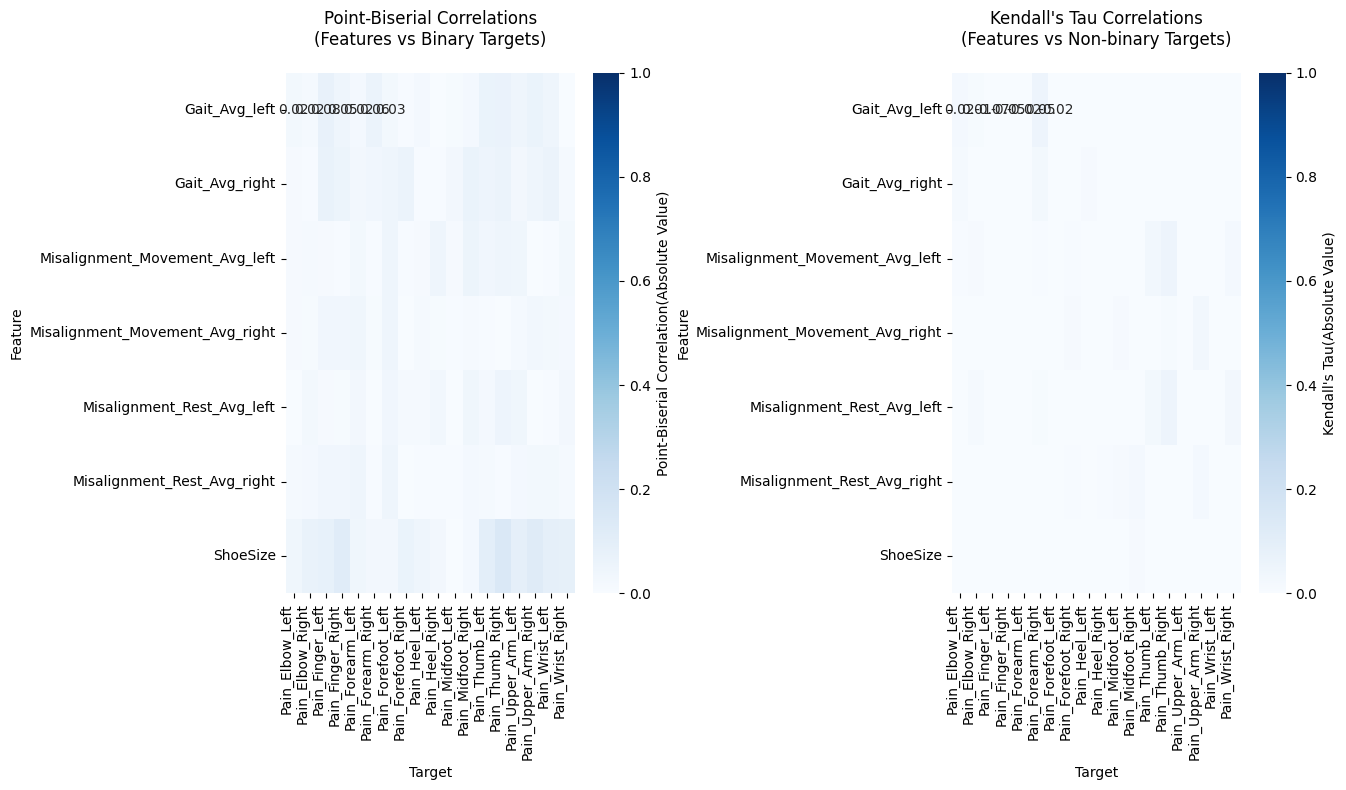

In [59]:
p_biserial_result['Correlation'] = p_biserial_result['Correlation'].apply(abs)
plot_correlation_heatmaps(p_biserial_result, k_tau_result) 

##### 6.4.2. Without outliers in the feature columns 

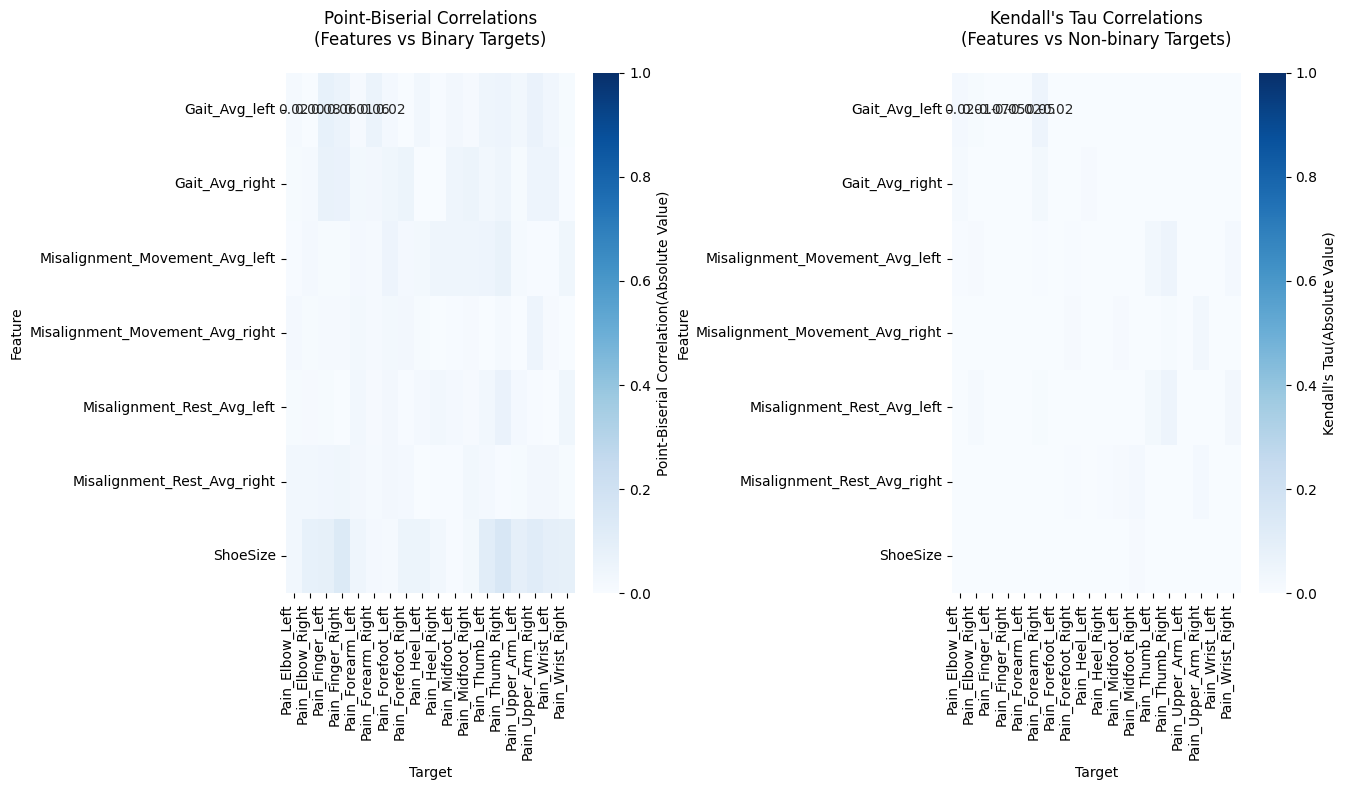

In [60]:
p_biserial_result_no_outliers['Correlation'] = p_biserial_result_no_outliers['Correlation'].apply(abs)
plot_correlation_heatmaps(p_biserial_result_no_outliers, k_tau_result_no_outliers)

#### 6.5. Inspect the distribution of the feature values by the target values

#### Define a function to plot boxplots

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_binary_target_boxplots(features, binary_targets, max_plots_per_page=49):
    # Determine the number of subplots needed
    n_cols = len(features.columns)
    n_rows = len(binary_targets.columns)
    total_plots = n_rows * len(features.columns)
    
    # Calculate the number of pages needed
    num_pages = (total_plots + max_plots_per_page - 1) // max_plots_per_page
    
    for page in range(num_pages):
        plt.figure(figsize=(30, min(n_rows, max_plots_per_page // n_cols) * 5))
        
        # Plot for binary targets
        for idx, target_col in enumerate(binary_targets.columns):
            for jdx, feature_col in enumerate(features.columns):
                plot_index = idx * len(features.columns) + jdx
                # Skip plots that are not on the current page
                if plot_index < page * max_plots_per_page or plot_index >= (page + 1) * max_plots_per_page:
                    continue
                
                plt.subplot(min(n_rows, max_plots_per_page // n_cols), n_cols, plot_index % max_plots_per_page + 1)
                if feature_col == 'ShoeSize':
                    sns.countplot(x=features[feature_col], hue=binary_targets[target_col])
                else:
                    sns.boxplot(x=binary_targets[target_col], y=features[feature_col])
                plt.title(f'{feature_col} by {target_col}', fontsize=8)
                plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()

def plot_non_binary_target_boxplots(features, non_binary_targets, max_plots_per_page=49):
    # Determine the number of subplots needed
    n_cols = len(features.columns)
    n_rows = len(non_binary_targets.columns)
    total_plots = n_rows * len(features.columns)
    
    # Calculate the number of pages needed
    num_pages = (total_plots + max_plots_per_page - 1) // max_plots_per_page
    
    for page in range(num_pages):
        plt.figure(figsize=(30, min(n_rows, max_plots_per_page // n_cols) * 5))
        
        # Plot for non-binary targets
        for idx, target_col in enumerate(non_binary_targets.columns):
            for jdx, feature_col in enumerate(features.columns):
                plot_index = idx * len(features.columns) + jdx
                # Skip plots that are not on the current page
                if plot_index < page * max_plots_per_page or plot_index >= (page + 1) * max_plots_per_page:
                    continue
                
                plt.subplot(min(n_rows, max_plots_per_page // n_cols), n_cols, plot_index % max_plots_per_page + 1)
                if feature_col == 'ShoeSize':
                    sns.countplot(x=features[feature_col], hue=non_binary_targets[target_col])
                else:
                    sns.boxplot(x=non_binary_targets[target_col], y=features[feature_col])
                plt.title(f'{feature_col} by {target_col}', fontsize=8)
                plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()

In [62]:
# remove outliers 
en_data_file_clean_no_outliers = en_data_file_clean.drop(index=outlier_indices)

#### Binary Targets

##### with outliers 

In [63]:
# plot_binary_target_boxplots(en_data_file_clean[feature_columns], en_data_file_clean[binary_target_columns])

##### without outliers 

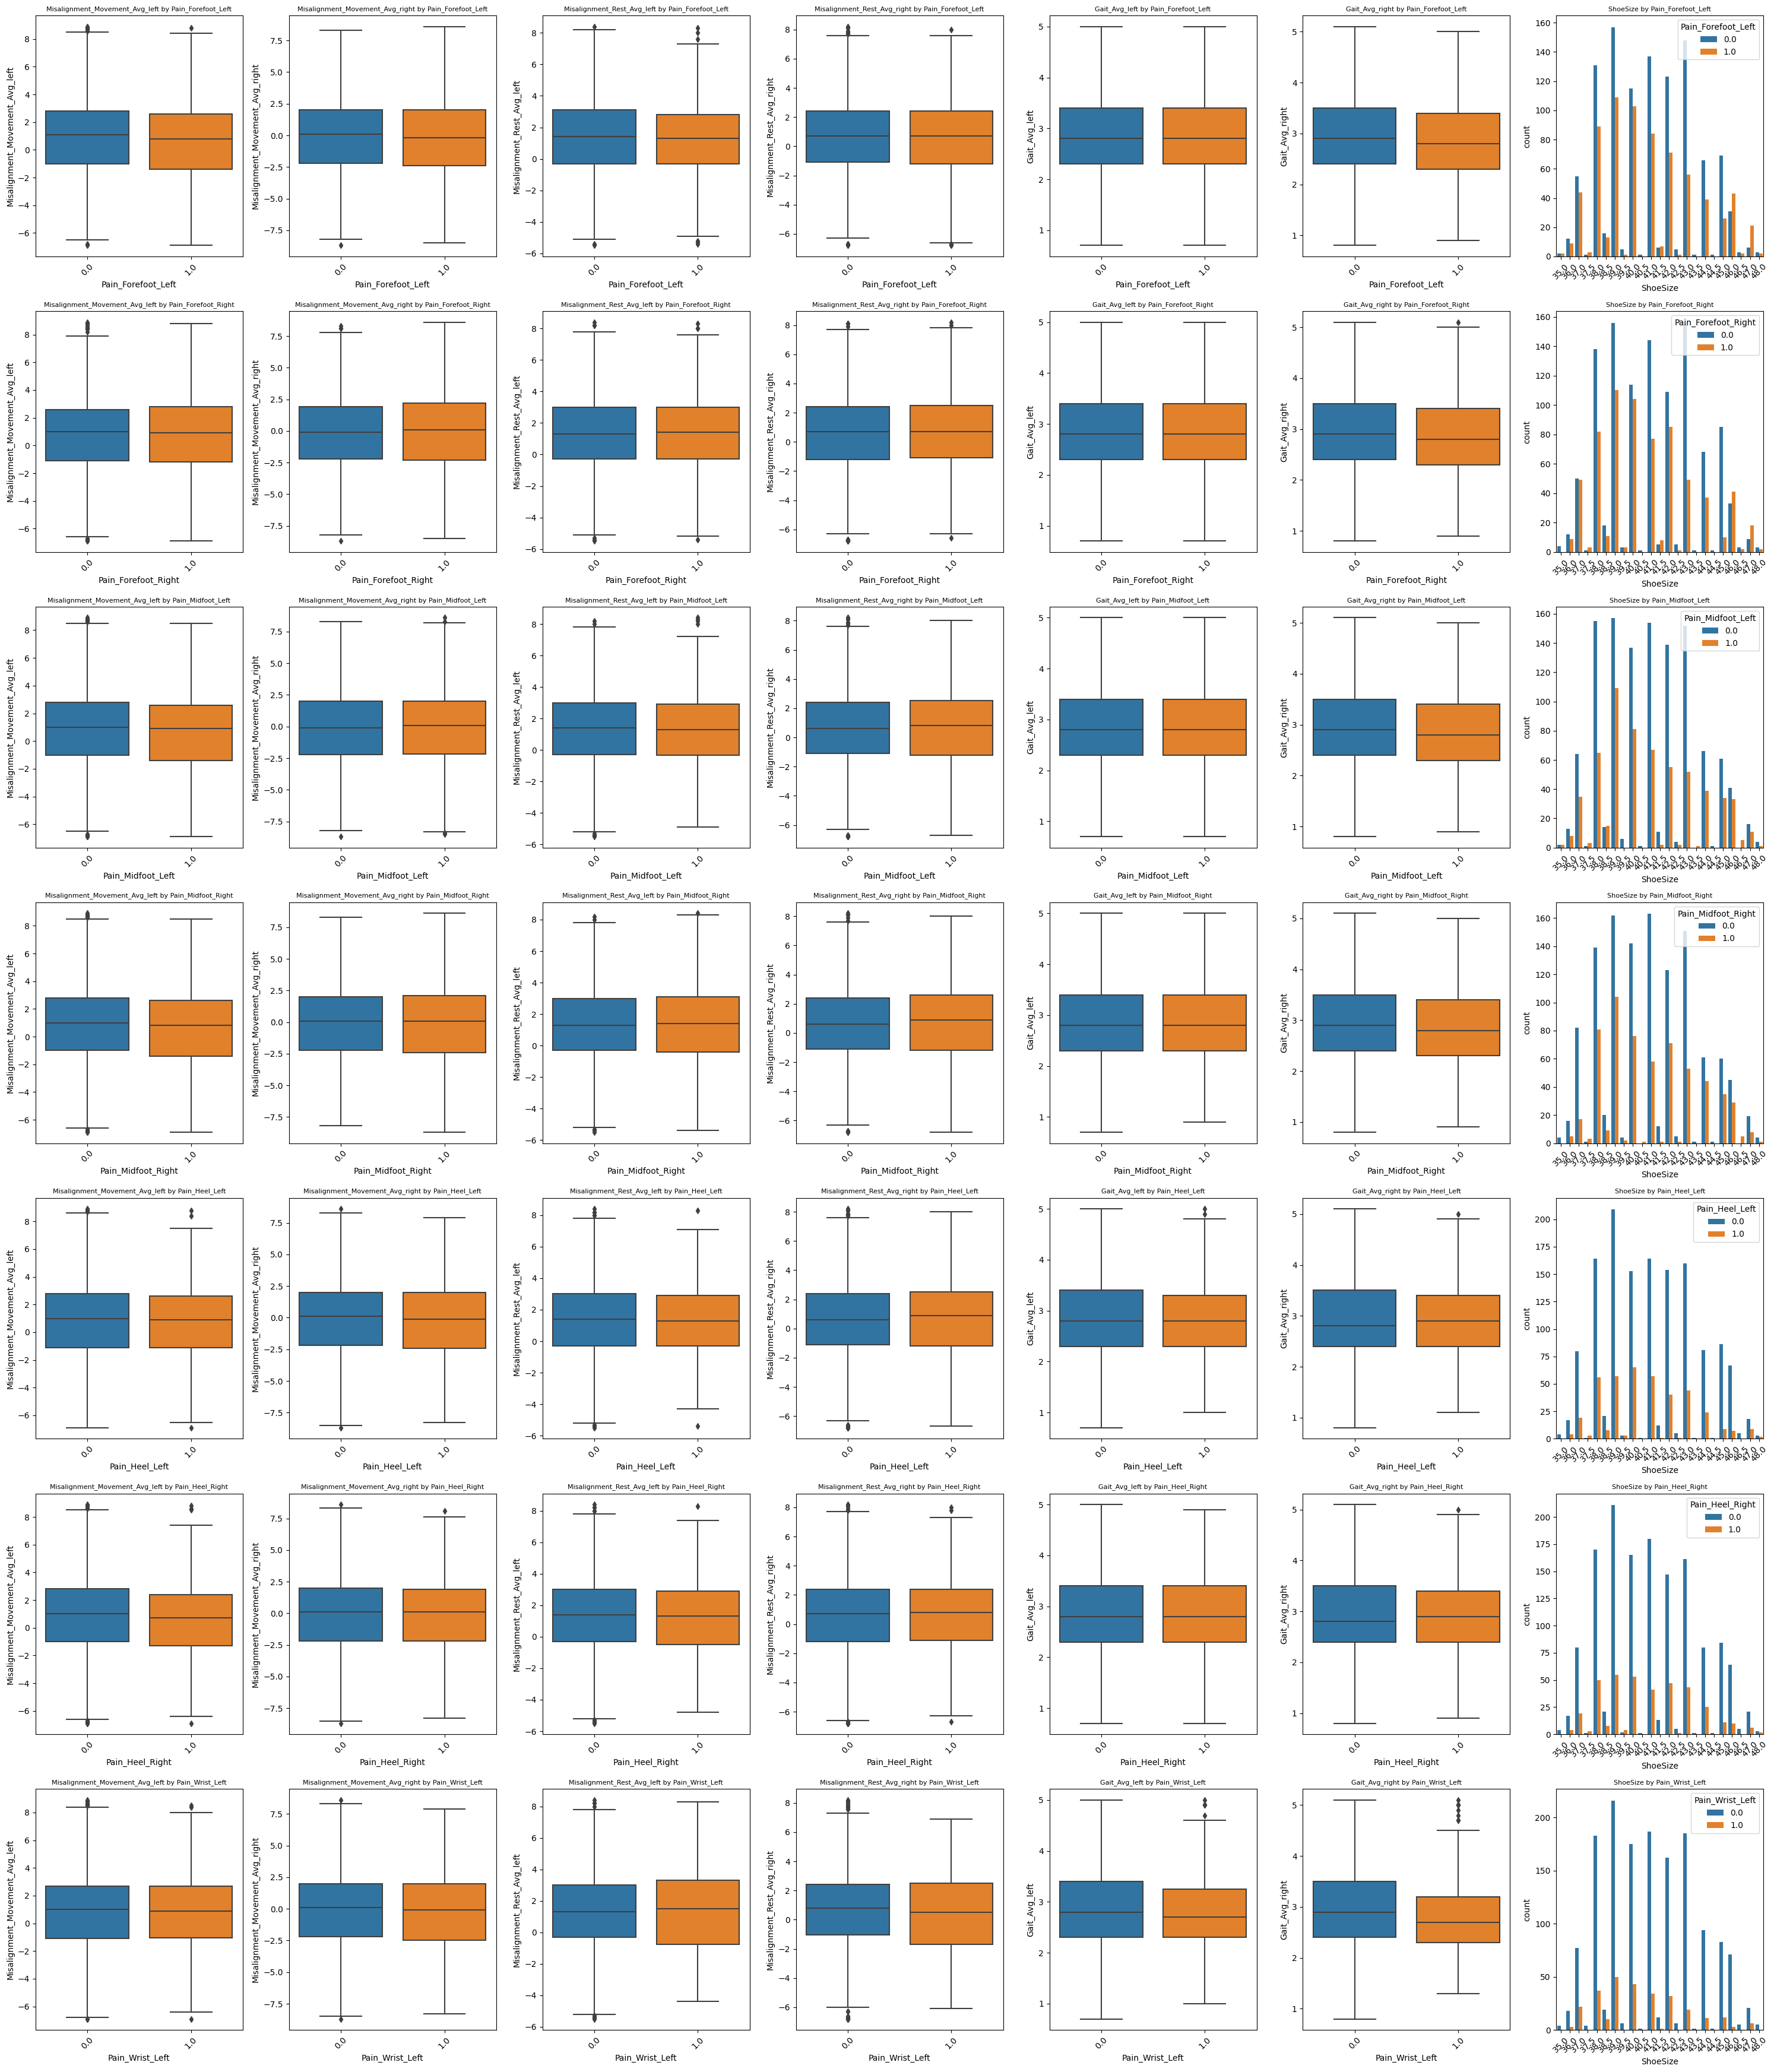

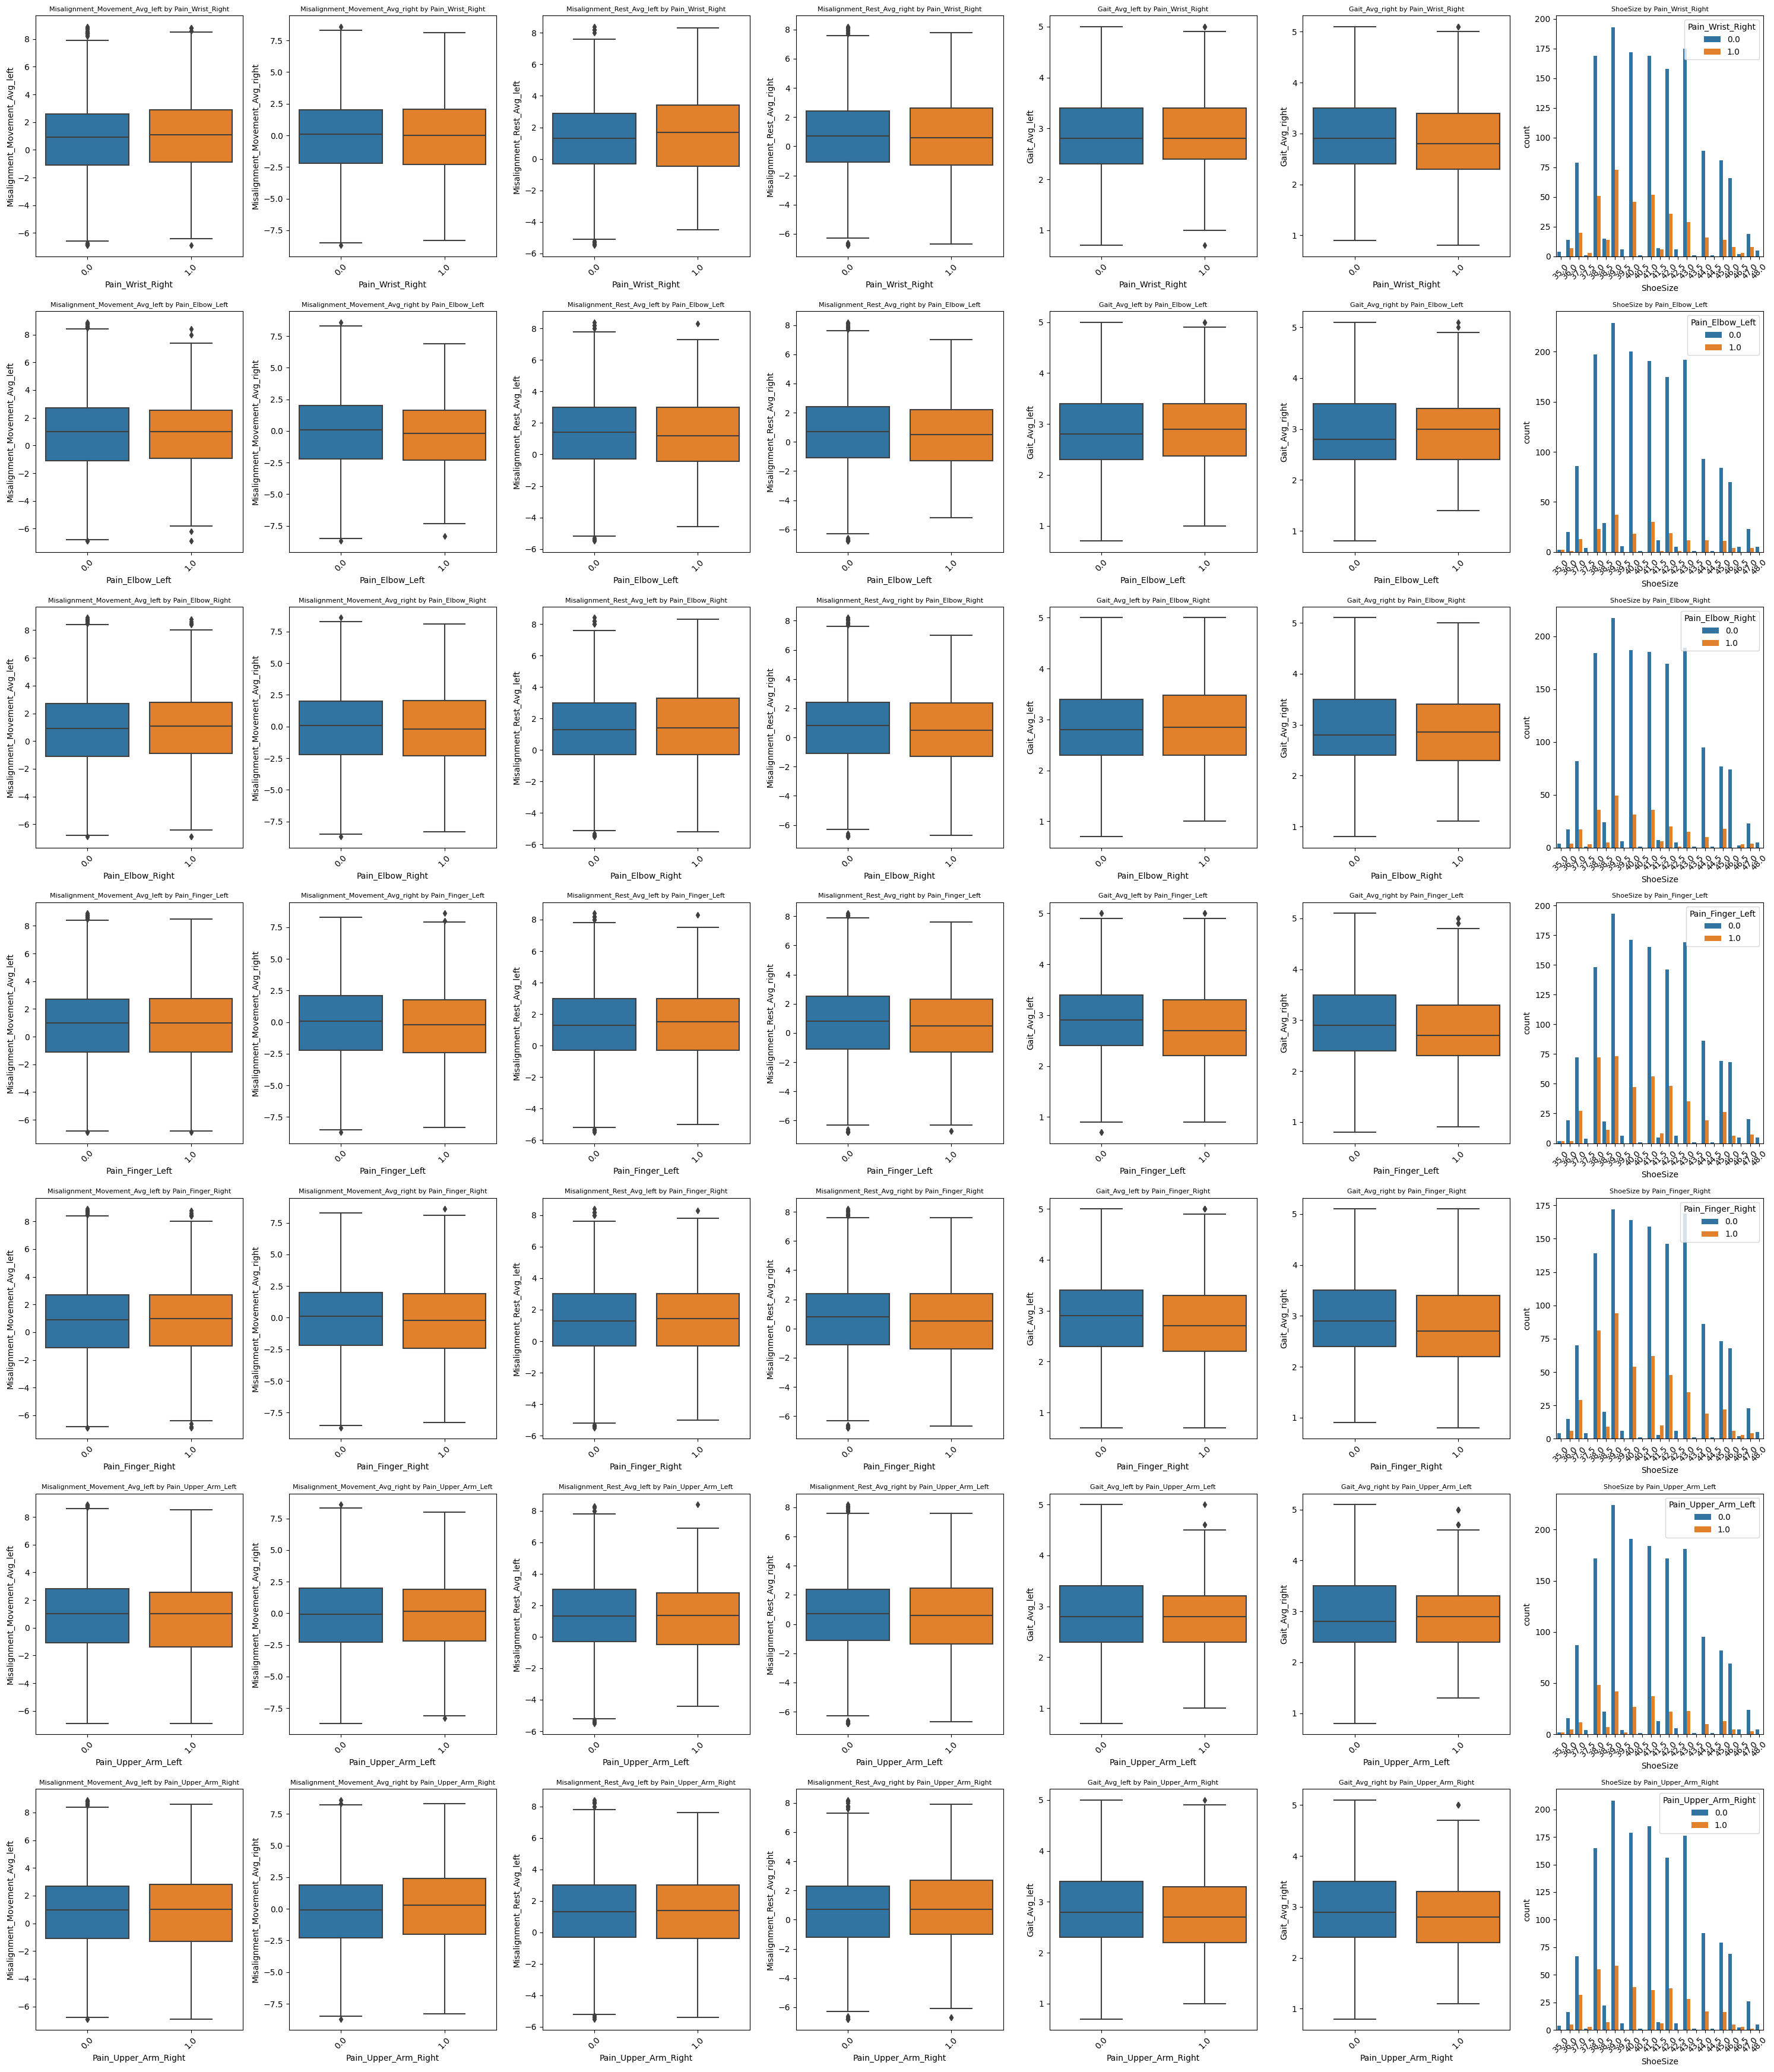

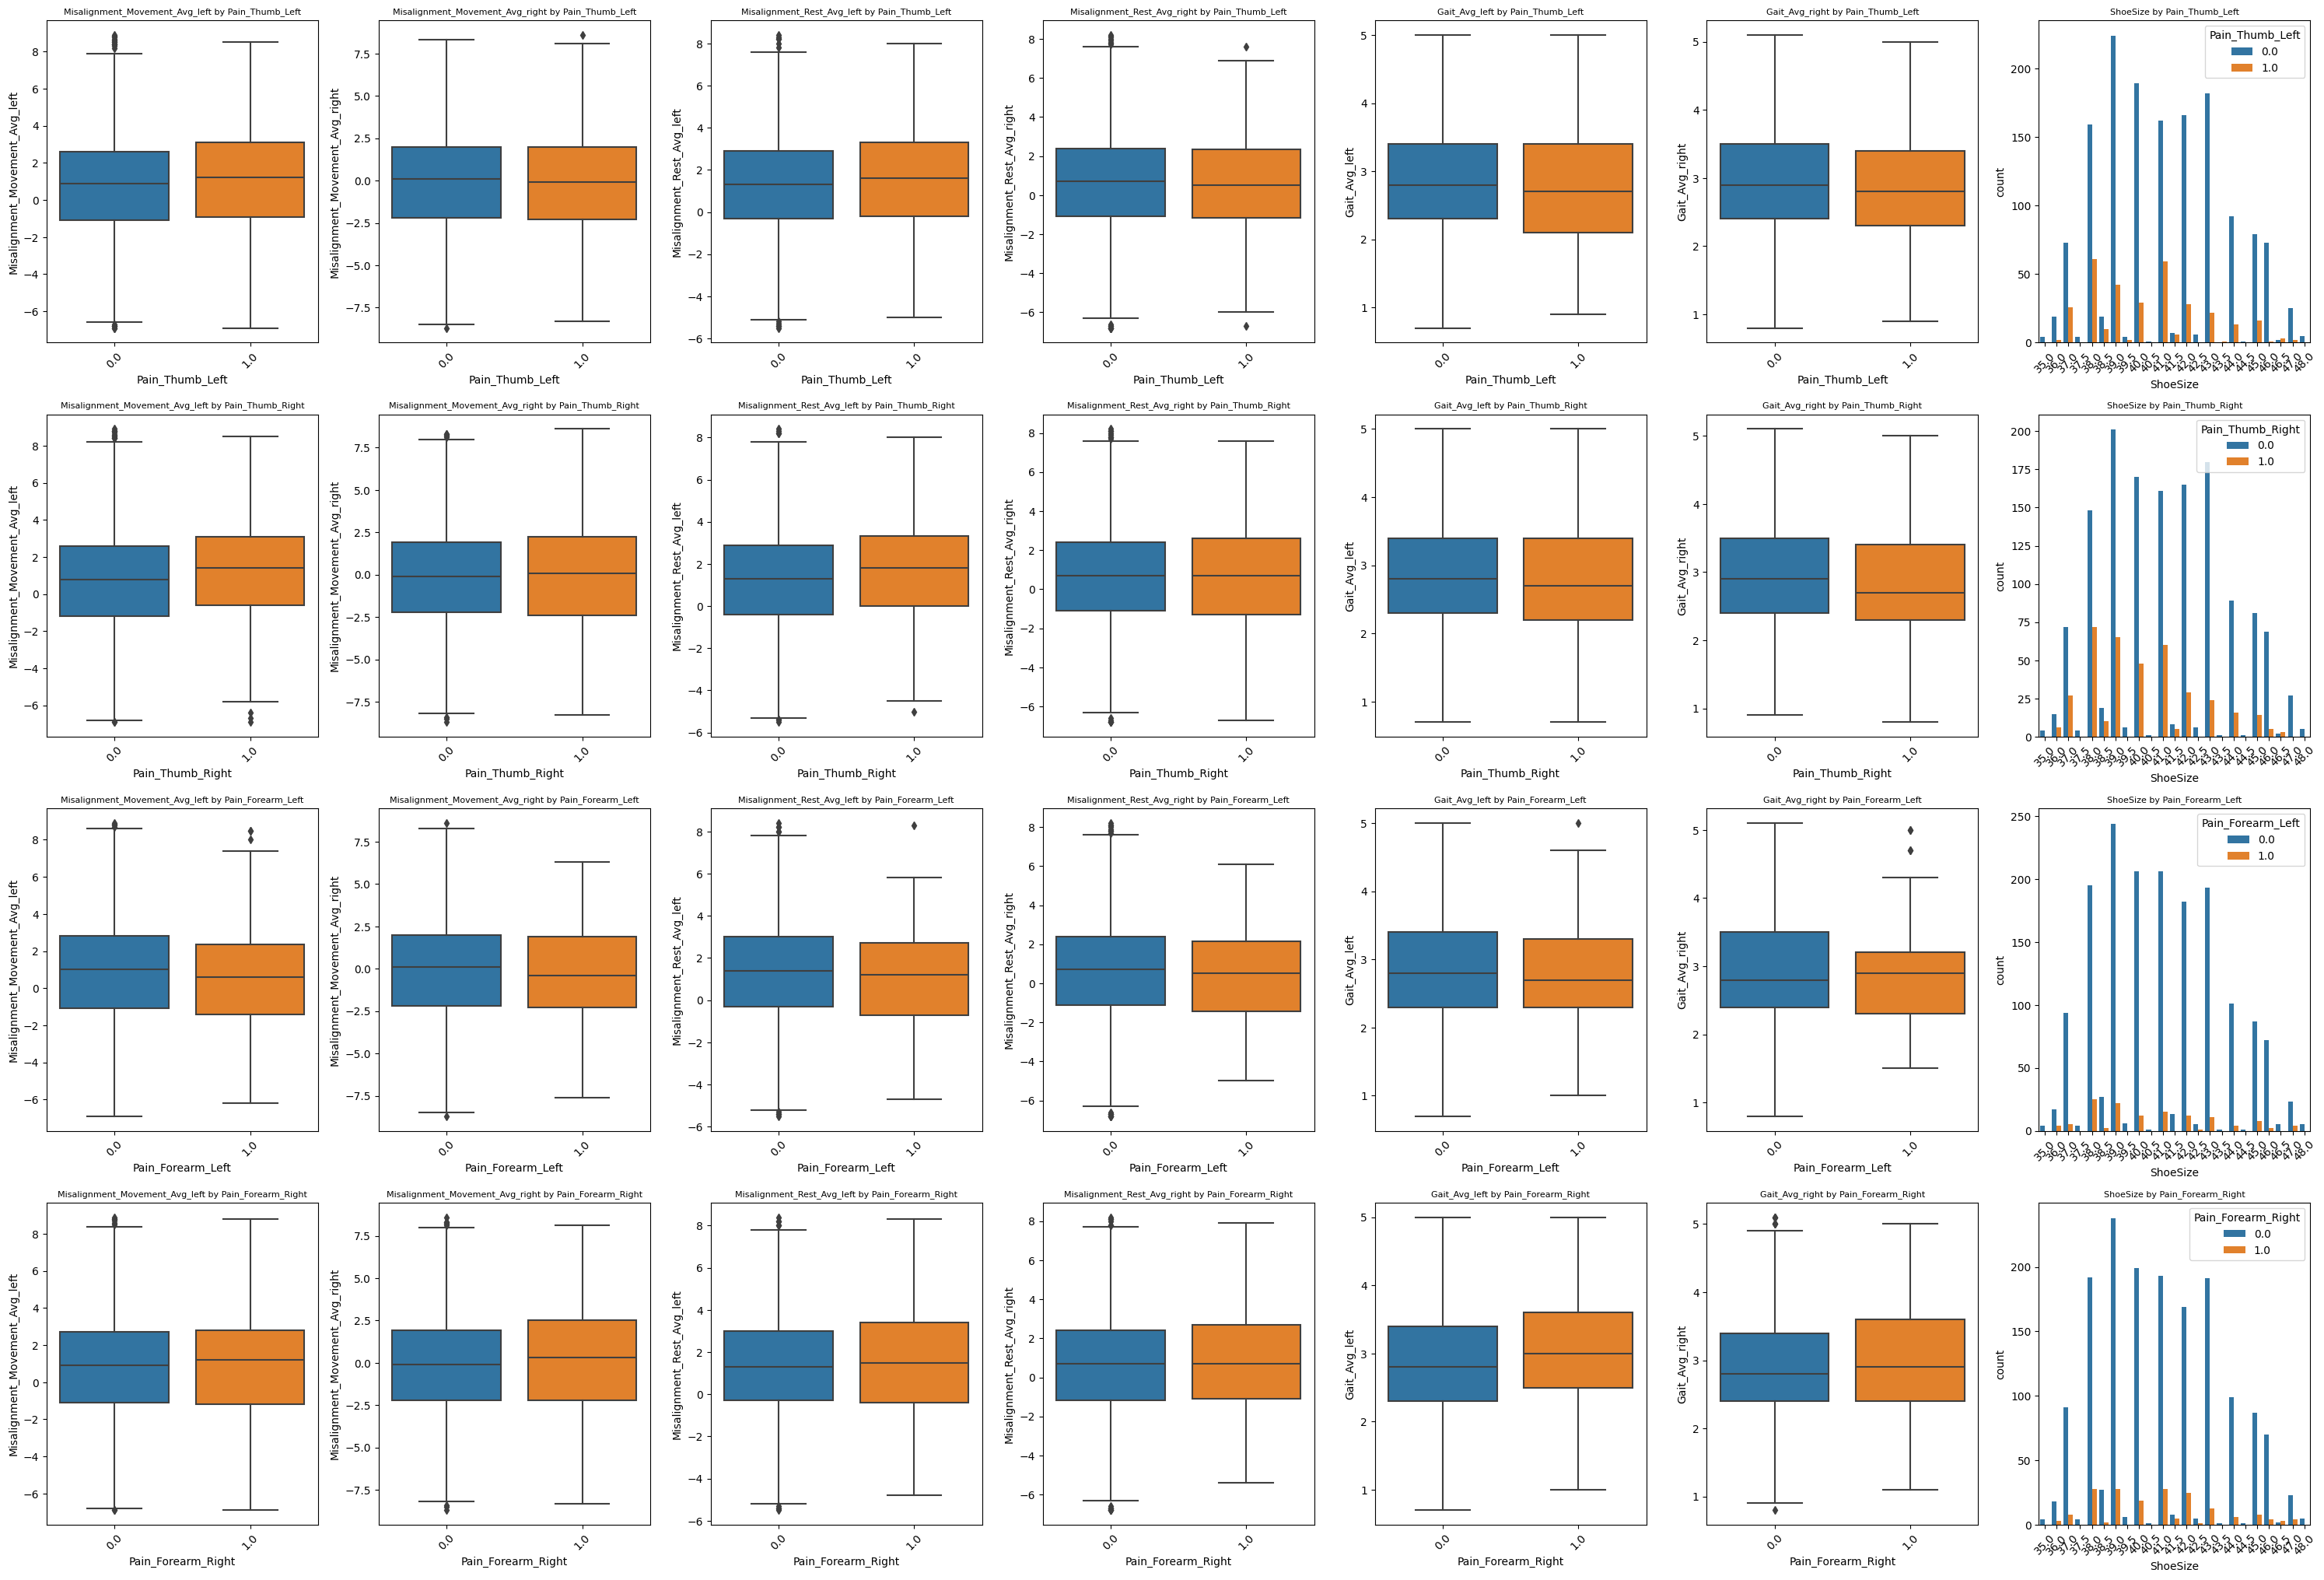

In [64]:
plot_binary_target_boxplots(en_data_file_clean_no_outliers[feature_columns], en_data_file_clean_no_outliers[binary_target_columns])

##### Non-binary Targets

##### with outliers 

In [65]:
# plot_non_binary_target_boxplots(en_data_file_clean[feature_columns], en_data_file_clean[non_binary_target_columns])

##### without outliers 

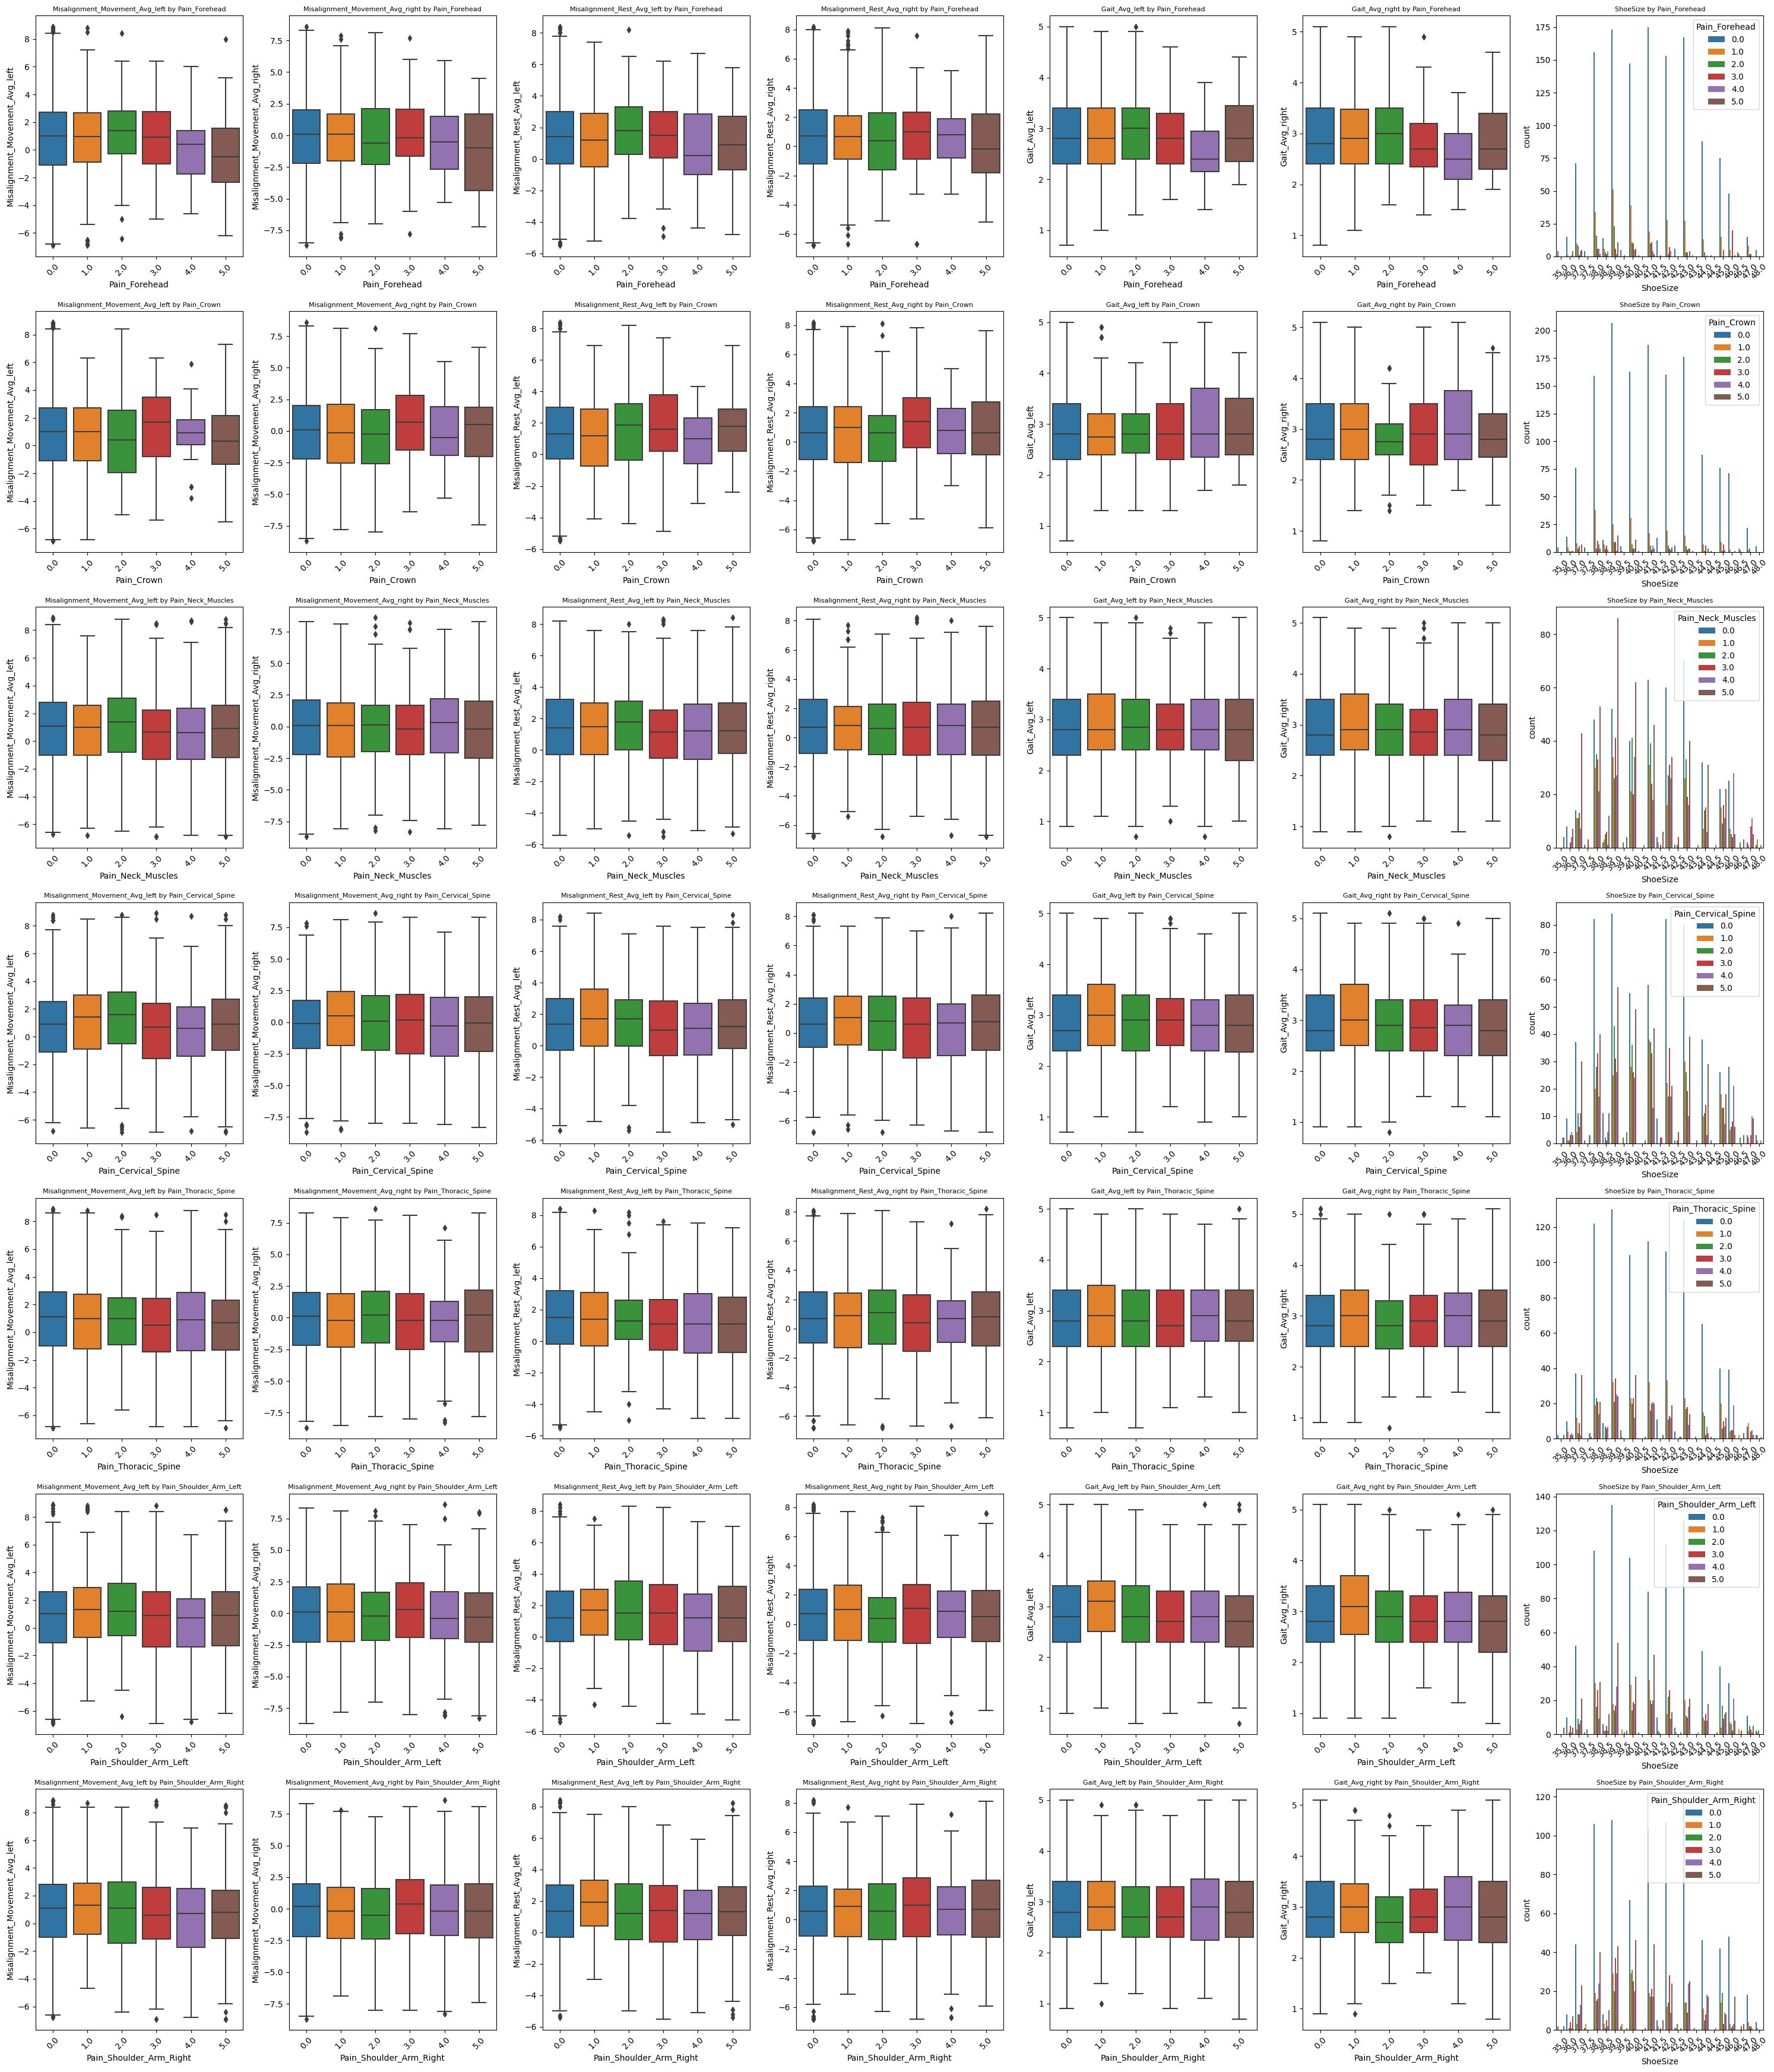

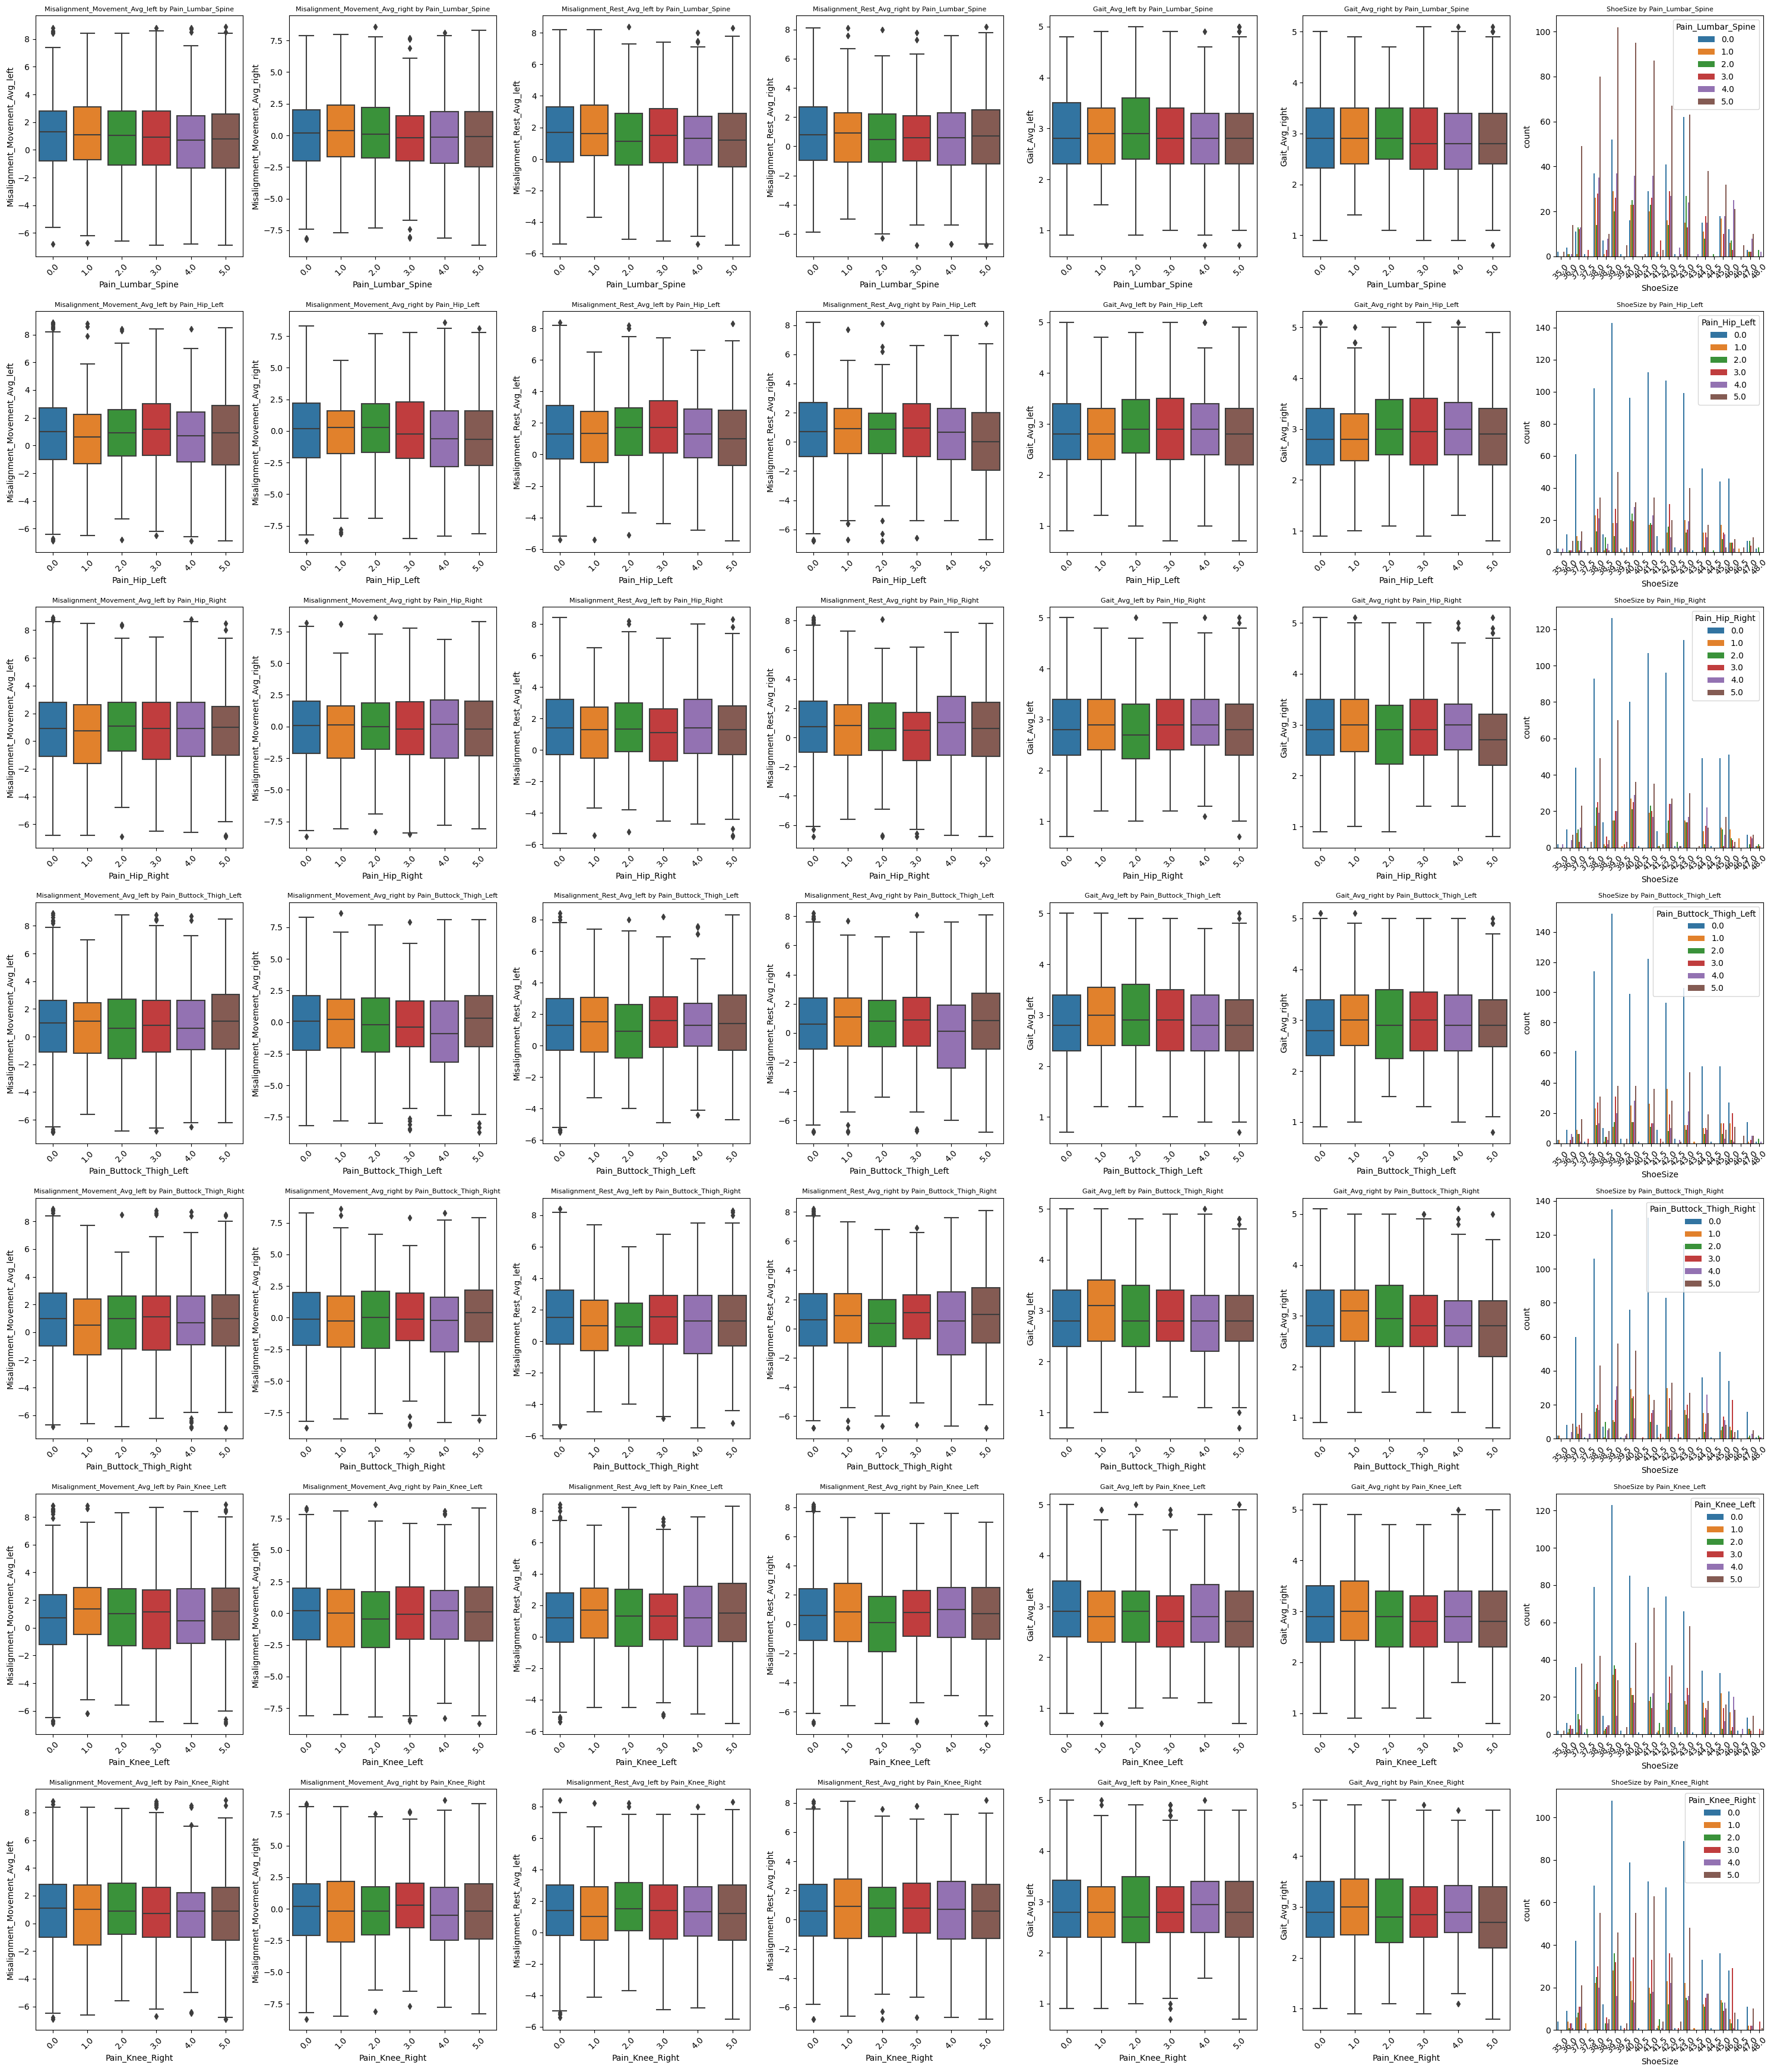

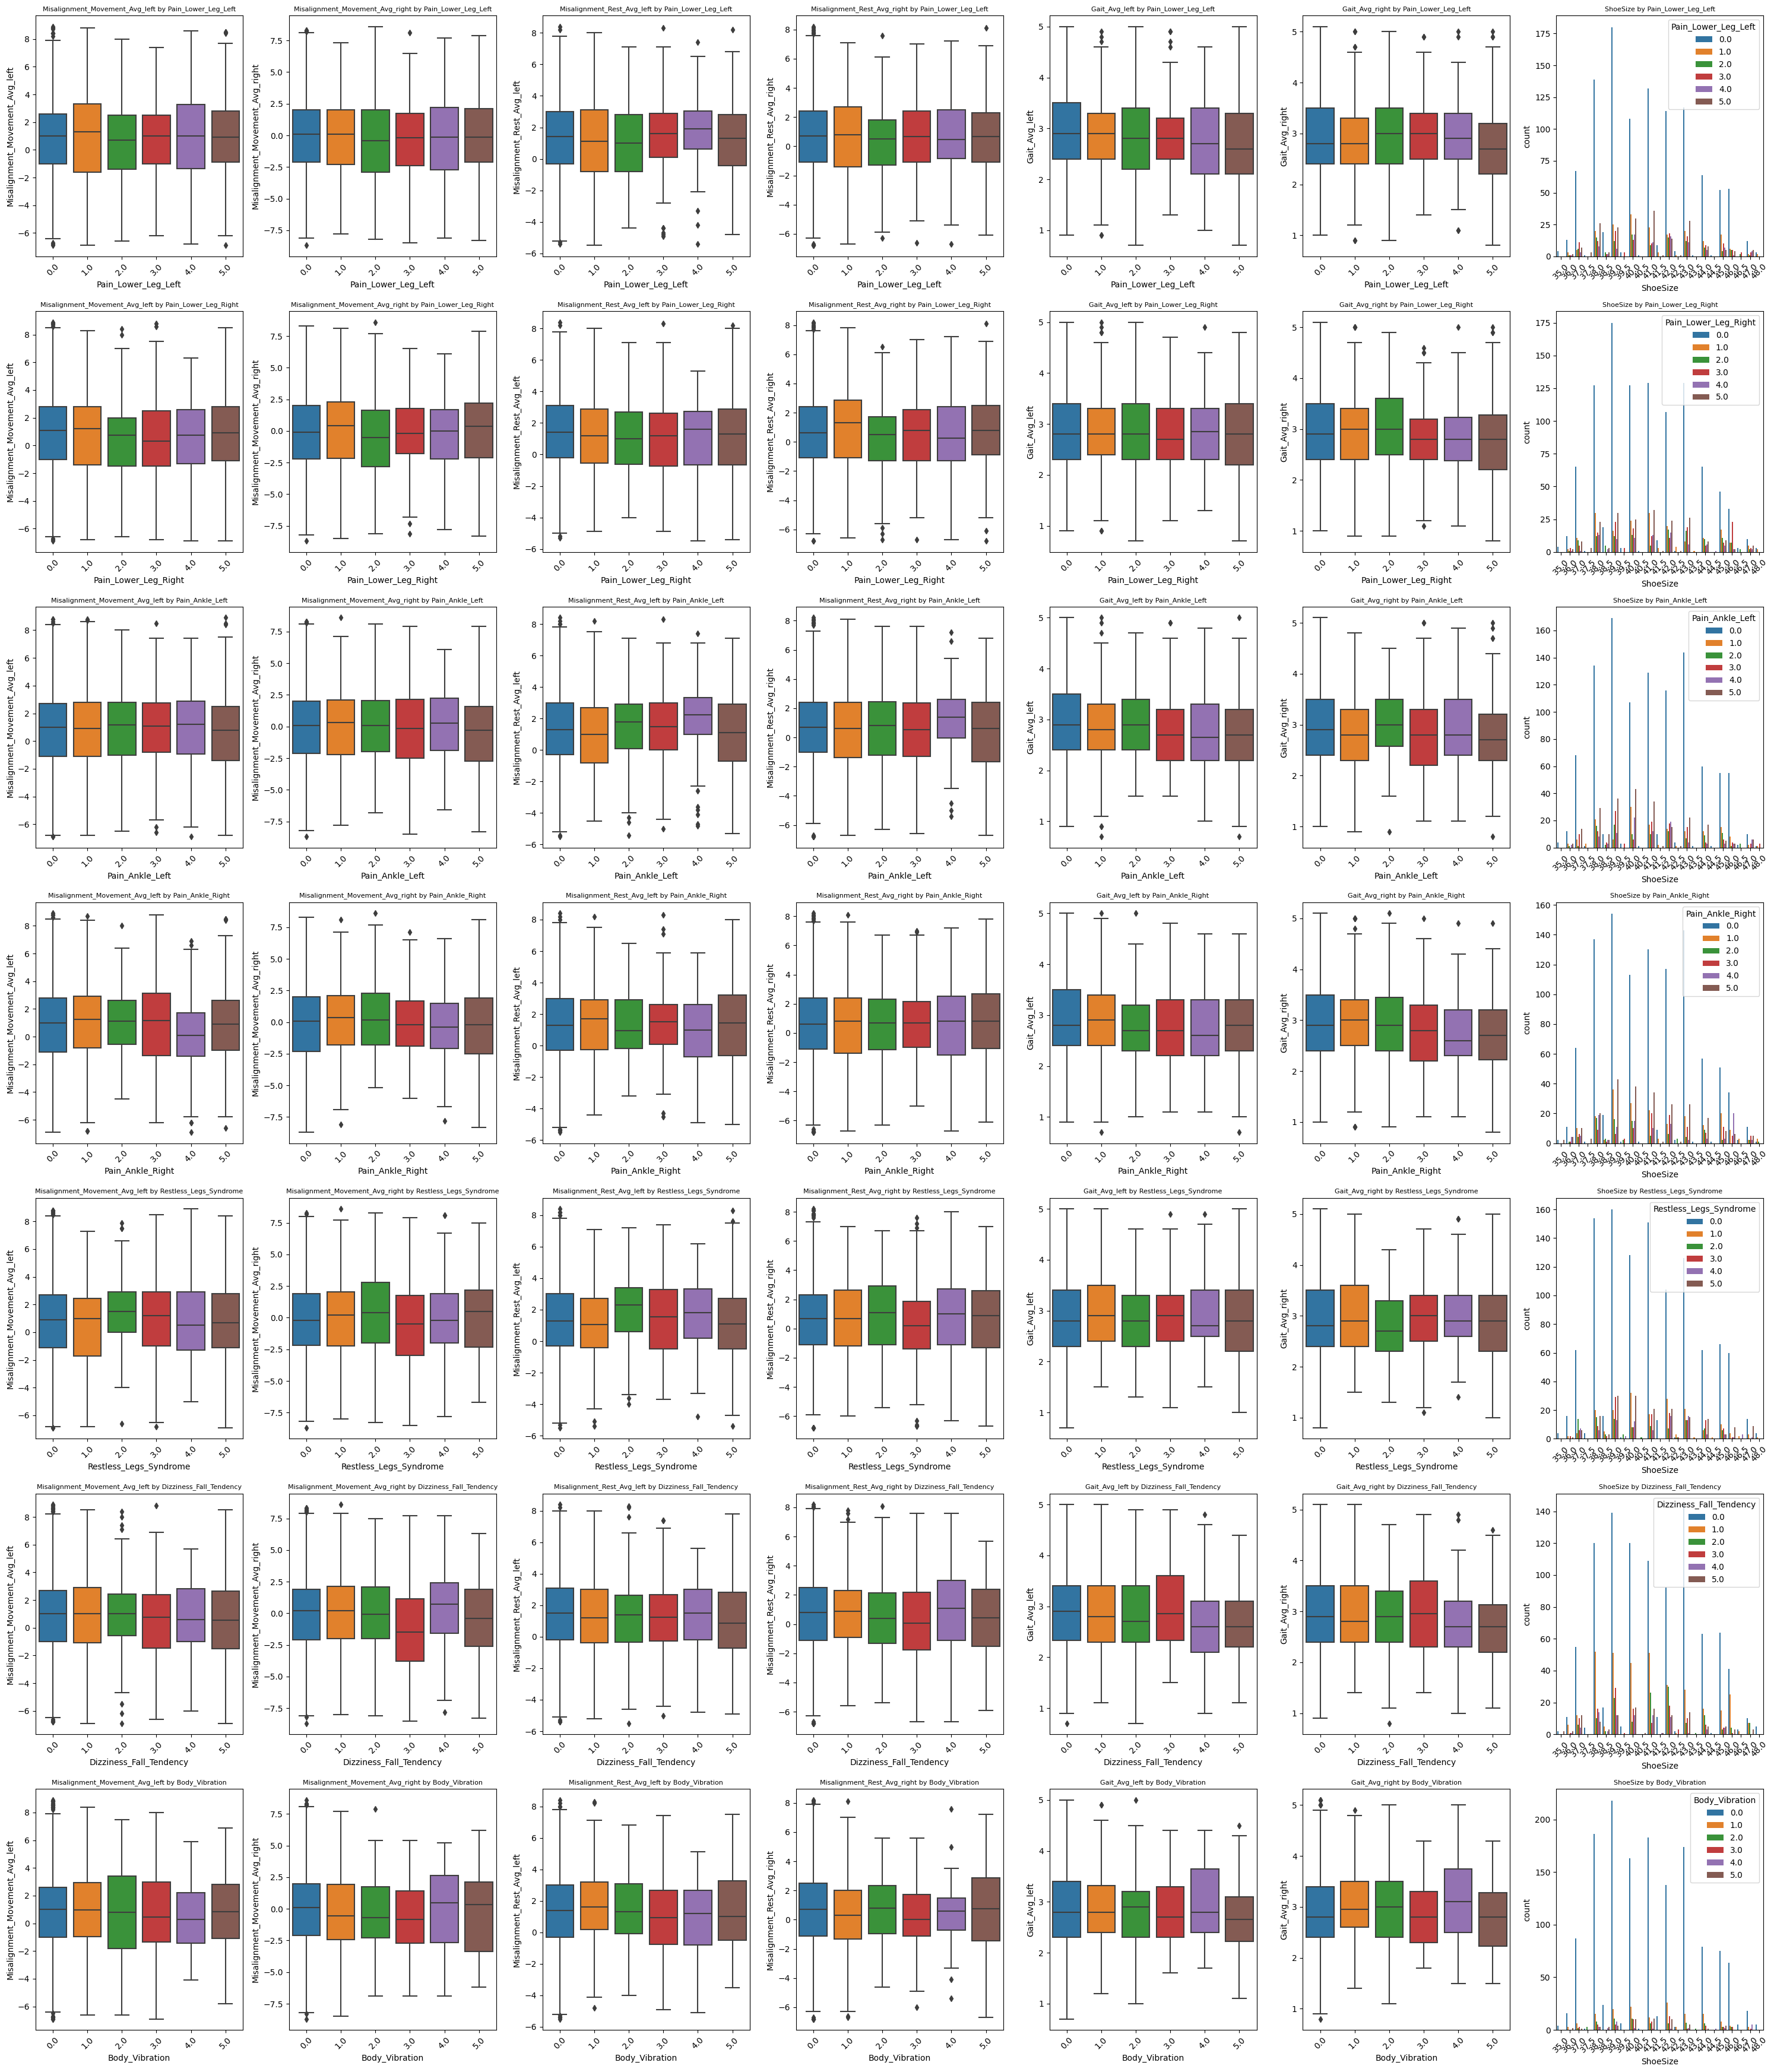

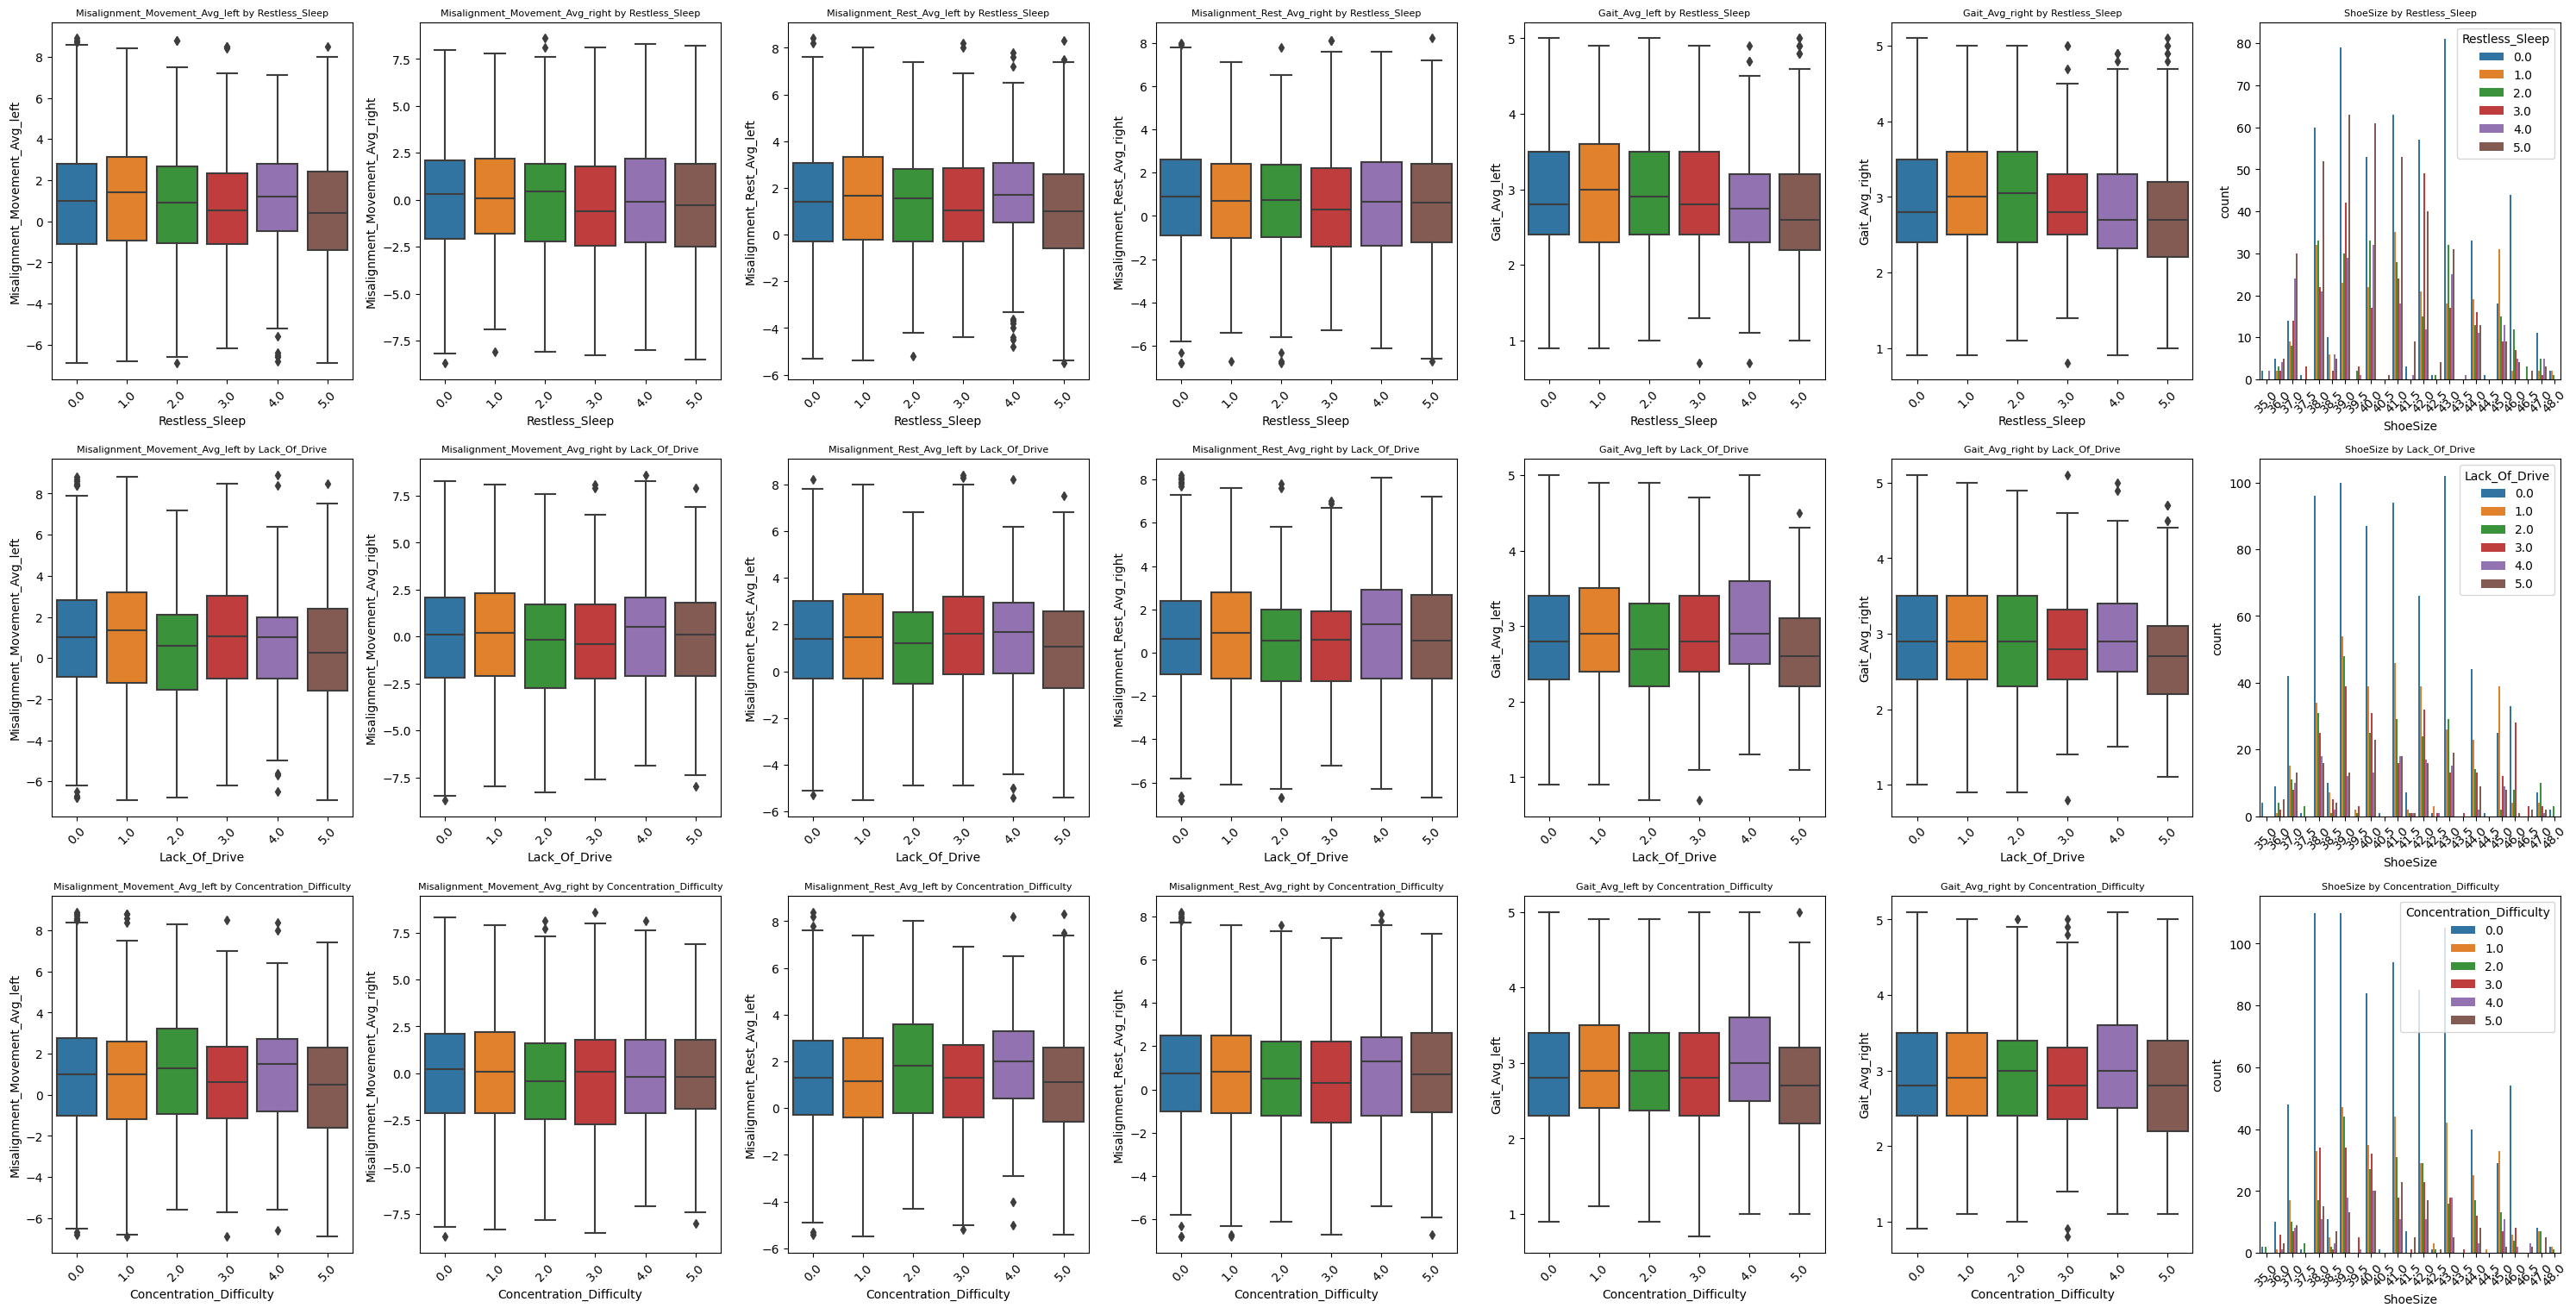

In [66]:
plot_non_binary_target_boxplots(en_data_file_clean_no_outliers[feature_columns], en_data_file_clean_no_outliers[non_binary_target_columns])

#### 6.6. Conclusion 
- Task Definition 
    - Multi-output, multi-class classification (c.f. MultiOutputClassifier in Scikitlearn package)
- Problem
    - Feature columns and the target columns don't seem to have a strong correlation nor a linear relationship. 
    - Feature have two different scales, some binary classes(dichotomous, binary nominal data), and some non-binary classes(polychotomous, nominal data). 
- possible approaches
    - Feature Engineering 
        - **create derived features** from the highly correlated features ( symmetric or anatomically close features)
        - use clustering methods such as K-means, group the data, and use the clustering methods as a new feature 
    - Feature Selection 
        - Select features that have higher importances, using models such as Tree Based Models ( feature importance method )
    - Use tree based models 
        - Since the feature columns and the target columns don't seem to have a strong correlation nor a linear relationship, tree based models can find the decision boundaries better. 
        - Scikit-learn package "MultiOutputClassifier" supports XGBoost as well
    - Train different models for different target variables ( dichotomous, polychotomous )
        - Use different models for binary and non-binary targets because the binary columns and non-binary columns are not related to each other. 
    - Possibly use deep learning models with encoder-decoder architecture to select the most important features ( for example, transformer )
        - Consider multi task learning (MTL) : some layers are shared, some layers are for specific tasks, which is similar to transfer learning
            - https://mapadubak.tistory.com/40, https://www.youtube.com/watch?v=rgVdlwIl1sc
            - If tasks are not related to each other, then the model performance will not be so good 
                - Caruana, 1997: "Multitask Learning" (Machine Learning Journal) : if the tasks are not related, MTL might not be beneficial 
                - Baxter, 2000: "A Model of Inductive Bias Learning in the Context of Multiple Task Learning" (Journal of Artificial Intelligence Research) : if the relationship between the tasks are learned, MTL can perform worse than single-task learning 
                - Ruder, 2017: "An Overview of Multi-Task Learning in Deep Neural Networks" (ArXiv Preprint) : the higher correlation between tasks, the more performance can be improved through feature sharing, whereas if not, negative transfer can occer. 
                - When the relationships between tasks are unclear, instead of Hard Parameter Sharing (shared network), **Soft Parameter Sharing** (constraining each task-specific network to learn similar features) can be used.


https://scikit-learn.org/stable/modules/multiclass.html  
https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html  
https://conanmoon.medium.com/데이터-과학-유망주의-매일-글쓰기-캡스톤-프로젝트-1-4주차-5690591dba43  
https://xgboosting.com/xgboost-for-multi-label-classification-with-multioutputclassifier/  
https://datascience.stackexchange.com/questions/17710/is-feature-engineering-still-useful-when-using-xgboost   

## 7.Assessing the Impact of Feature Variables on Group Differentiation

Process 

- Equal Variance Test 
    - Levene's Test (Continuous / Discrete Values)
        - Measures the variance of feature values per class in each target column.
    - Purpose of Equal Variance Test
        - Some statistical tests, such as t-test and ANOVA, assume that the variance of feature values per class in each target column is equal.
        - If equal variance → t-test for binary targets, ANOVA for non-binary targets can be used.
        - If unequal variance → Non-parametric tests (Welch's t-test for binary targets, Kruskal-Wallis test for non-binary targets) should be used.
    - Equal Variance Test is not necessary if Welch's t-test and Kruskal Wallis test are used (less strict restrictions)
    - Obesrvation 
        - Only a few pairs of features and targets have equal variance, so non-parametric tests are used.

- Test Mean(Median) Difference of Feature Variables across Classes for every Target Column 
    - Welch's t-test for feature variables across classes for each binary target columns 
    - Kruskal-Wallis test for feature variables across classes for each non-binary target columns 
    - The purpose of these tests is to determine whether the mean (or median in non-parametric tests) of feature values differs across target classes. 
        - If the means (or medians) are equal, then the feature does not significantly contribute to distinguishing between     different classes in the target column.
        - If they are different, the feature may be important for classification.


https://en.wikipedia.org/wiki/Levene%27s_test (normality not required)  
https://www.itl.nist.gov/div898/handbook/eda/section3/eda35a.htm  
Bartlett's test (normality required)  
Fligner-Killeen Test ( Robust against non-normality)

#### 7.1. Equal Variance Test 

In [67]:
en_data_file_clean_no_outliers = en_data_file_clean.drop(index=outlier_indices)

In [68]:
import pandas as pd
from scipy.stats import levene

# Function to perform Levene's test for each feature against each target class
def levene_test(feature_data, target_data):
    results = []
    for target_col in target_data.columns:
        for feature_col in feature_data.columns:
            # Get unique classes in the target column
            unique_classes = target_data[target_col].unique()
            
            # Create groups for each unique class
            groups = []
            for cls in unique_classes:
                # Get the data for feature_col where the target column equals the current class
                # Then, drop any missing values from this data
                group_data = feature_data.loc[target_data[target_col] == cls, feature_col].dropna()
                groups.append(group_data)
            
            # Perform Levene's test
            stat, p_value = levene(*groups)
            
            results.append({
                'Feature': feature_col,
                'Target': target_col,
                'Levene Stat': stat,
                'p-value': p_value
            })
    
    return pd.DataFrame(results).sort_values('p-value')

In [69]:
feature_data_no_outliers = en_data_file_clean_no_outliers[feature_columns]
target_data_no_outliers = en_data_file_clean_no_outliers[target_columns]

# Perform Levene's test
levene_results = levene_test(feature_data_no_outliers, target_data_no_outliers)

# Display results
print(f'Number of features with significant difference in variance: {len(levene_results[levene_results["p-value"] < 0.05])}')
print(f'Number of features with no significant difference in variance: {len(levene_results) - len(levene_results[levene_results["p-value"] < 0.05])}')


Number of features with significant difference in variance: 44
Number of features with no significant difference in variance: 250


#### 7.2. Perform Welch's t-test and Kruskal-Wallis test 

In [70]:
import pandas as pd
from scipy.stats import ttest_ind, levene
from scipy.stats import kruskal

# Function to perform Welch's t-test for binary target columns
def welch_t_test(feature_data_clean_no_outliers, binary_targets):
    results = []
    for target_col in binary_targets.columns:
        for feature_col in feature_data_clean_no_outliers.columns:
            # Get data for the two groups
            group1 = feature_data_clean_no_outliers[feature_col][binary_targets[target_col] == 0]
            group2 = feature_data_clean_no_outliers[feature_col][binary_targets[target_col] == 1]
            
            # Perform Welch's t-test
            t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
            
            results.append({
                'Feature': feature_col,
                'Target': target_col,
                't-statistic': t_stat,
                'p-value': p_value
            })
    
    return pd.DataFrame(results).sort_values('p-value')

# Function to perform Kruskal-Wallis test for non-binary target columns
def kruskal_wallis_test(feature_data_clean_no_outliers, non_binary_targets):
    results = []
    for target_col in non_binary_targets.columns:
        for feature_col in feature_data_clean_no_outliers.columns:
            # Get unique classes in the target column
            unique_classes = non_binary_targets[target_col].unique()
            
            # Create groups for each unique class.
            groups = []
            for cls in unique_classes:
                # Get the data for feature_col corresponding to the current class and drop missing values.
                group_data = feature_data_clean_no_outliers[feature_col][non_binary_targets[target_col] == cls].dropna()
                # Add the group data to the list.
                groups.append(group_data)
            
            # Perform Kruskal-Wallis test
            stat, p_value = kruskal(*groups)
            
            results.append({
                'Feature': feature_col,
                'Target': target_col,
                'Kruskal-Wallis Stat': stat,
                'p-value': p_value
            })
    
    return pd.DataFrame(results).sort_values('p-value')

In [71]:
feature_data_clean_no_outliers = en_data_file_clean_no_outliers[feature_columns]#.drop(columns=['ShoeSize'])
binary_target_data_clean_no_outliers = en_data_file_clean_no_outliers[binary_target_columns]
non_binary_target_data_clean_no_outliers = en_data_file_clean_no_outliers[non_binary_target_columns]

# Perform Welch's t-test
welch_results = welch_t_test(feature_data_clean_no_outliers, binary_target_data_clean_no_outliers)

# Perform Kruskal-Wallis Test 
kruskal_results = kruskal_wallis_test(feature_data_clean_no_outliers, non_binary_target_data_clean_no_outliers)

#### 7.3. Plot the results of welch's t-test and kruskal-wallis test ( Only the values with p-value < 0.05 are colored )

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_results_heatmap(welch_results, kruskal_results):
    plt.figure(figsize=(20, 8))
    
    # Welch's t-test results heatmap
    plt.subplot(1, 2, 1)
    welch_pivot = welch_results.pivot(index='Feature', columns='Target', values='p-value')
    mask = welch_pivot >= 0.05  # Mask values greater than or equal to 0.05
    sns.heatmap(welch_pivot, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'p-value'}, mask=mask)
    plt.title("Welch's t-test Results (p-value < 0.05)")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    
    # Kruskal-Wallis test results heatmap
    plt.subplot(1, 2, 2)
    kruskal_pivot = kruskal_results.pivot(index='Feature', columns='Target', values='p-value')
    mask = kruskal_pivot >= 0.05  # Mask values greater than or equal to 0.05
    sns.heatmap(kruskal_pivot, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'p-value'}, mask=mask)
    plt.title("Kruskal-Wallis Test Results (p-value < 0.05)")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    plt.show()

/Users/jaeyeopchung/.pyenv/versions/test-en/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior

/Users/jaeyeopchung/.pyenv/versions/test-en/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



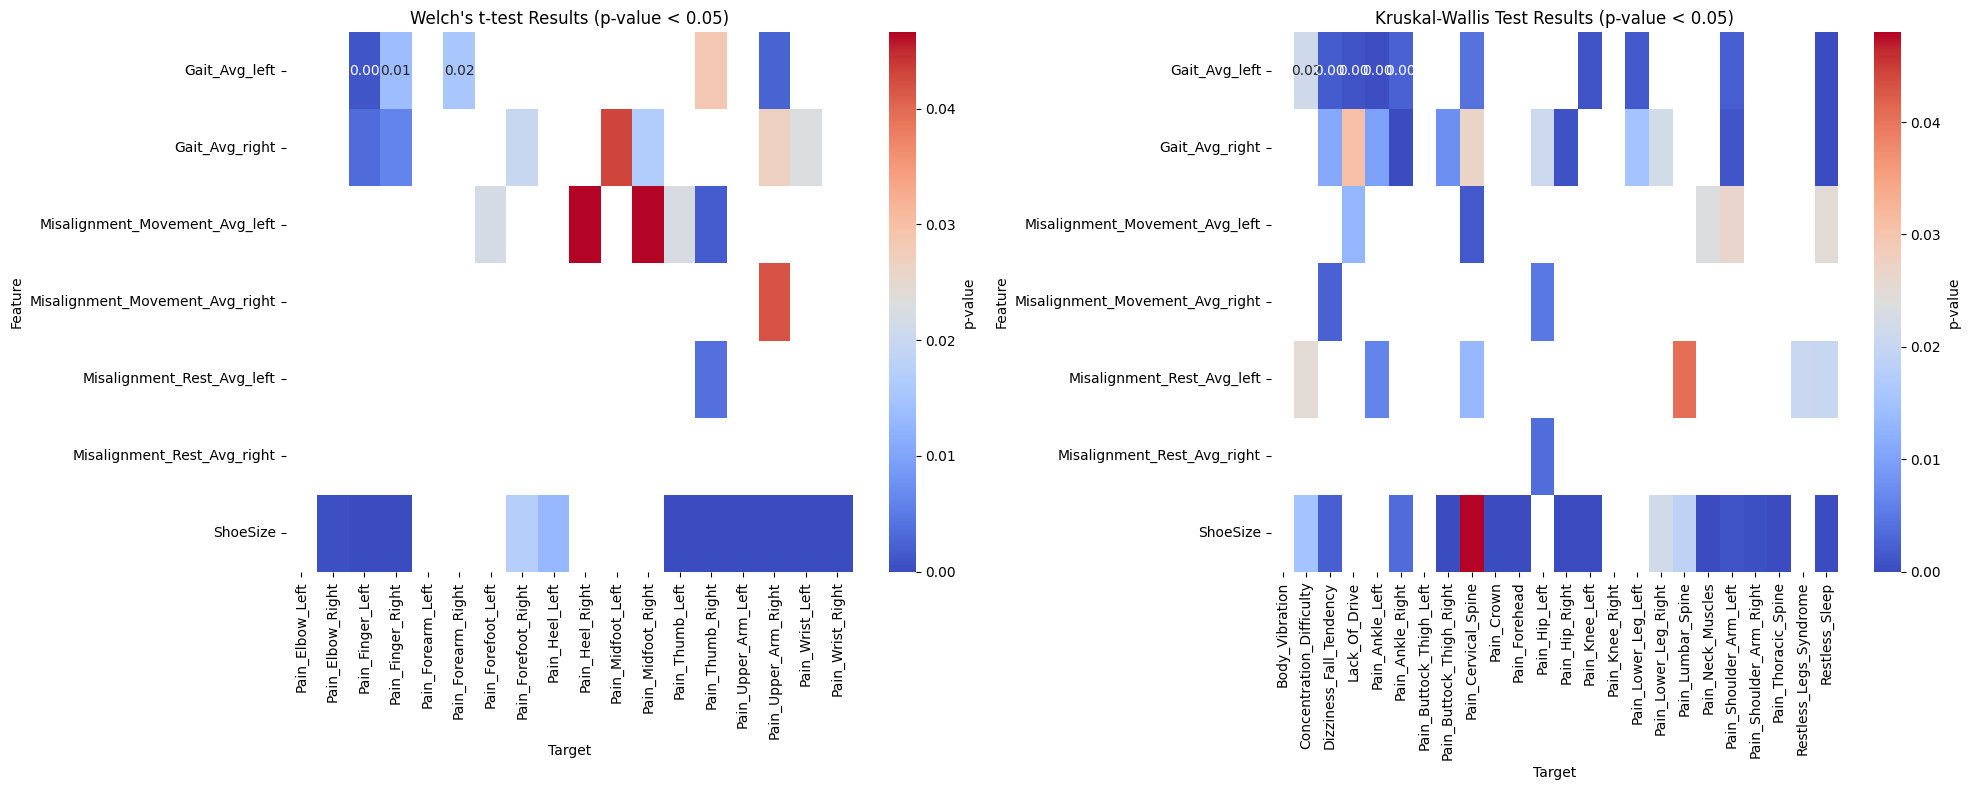

In [73]:
# Call the function with your results
plot_results_heatmap(welch_results, kruskal_results)

#### 7.4. Interpretation and Observation   
- **Interpretation**
  - If the p-values are low, then there are meaningful differences in the feature values across the target classes in the target column.
  - $\Longleftrightarrow$ For each class in the target column, the mean(median) values of these features are meaningfully different.

- **Observation**
  - Many of the features across classes have low p-values ( no difference across classes )
    - It may be due to the class imbalance
  - **Gait Patterns & Pain Areas:**  
    A significant relationship exists between gait patterns (**Gait_Avg_left**, **Gait_Avg_right**) and specific pain areas:  
    - **Forefoot pain (Left):** `Pain_Forefoot_Left`  
    - **Knee pain (Right):** `Pain_Knee_Right`  
    - **Cervical spine pain:** `Pain_Cervical_Spine`  

  - **Postural Misalignment & Pain:**  
    Postural misalignment (**Misalignment_Movement_Avg_left**, **Misalignment_Movement_Avg_right**, **Misalignment_Rest_Avg_left**, **Misalignment_Rest_Avg_right**) is related to:  
    - **Neck pain:** `Pain_Cervical_Spine`  
    - **Calf pain:** `Pain_Lower_Leg_Left`, `Pain_Lower_Leg_Right`  
    - **Restless Legs Syndrome:** `Restless_Legs_Syndrome`  

  - **Left Forefoot Pain & Related Factors:**  
    Left forefoot pain (`Pain_Forefoot_Left`) is associated with:  
    - **Shoe size:** `ShoeSize`  
    - **Gait patterns:** `Gait_Avg_left`, `Gait_Avg_right`  
    - **Postural misalignment:** `Misalignment_Movement_Avg_left`, `Misalignment_Rest_Avg_left`  

  - **Forehead Pain & Postural Misalignment:**  
    Forehead pain (`Pain_Forehead`) is linked to postural misalignment:  
    - `Misalignment_Movement_Avg_left`  
    - `Misalignment_Movement_Avg_right`  


---

## Summary of *5.5*, *6.6*, *7.4*   

#### **Feature Selection**
- Correlation Analysis Results  
    - **Gait_Avg_left** ↔ **Gait_Avg_right** (**0.979**) → Strong correlation  
    - **Misalignment_Movement_Avg_right** ↔ **Misalignment_Rest_Avg_right** (**0.968**) → Strong correlation  
    - **Misalignment_Movement_Avg_left** ↔ **Misalignment_Rest_Avg_left** (**0.960**) → Strong correlation  
    - Moderate correlation (**-0.5 to -0.6**) exists between **Gait_Avg_XXX** and **Misalignment_XXX** variables  

- VIF (Multicollinearity) Analysis Results  
    - **Gait_Avg_right**, **Gait_Avg_left**, **ShoeSize** → Very high VIF (multicollinearity issue)  
    - **Misalignment_XXX** variables have moderate VIF (**~5**), indicating some collinearity  
    - Removing **Gait_Avg_right**, **Gait_Avg_left** significantly reduces VIF  
    - These features can be inferred from others, so they should be removed  

- Welch’s t-test & Kruskal-Wallis test Results 
    - **Gait_Avg_left**, **Gait_Avg_right** → Statistically significant differences between specific pain areas  
    - **Misalignment_XXX** → Significant differences with **neck pain**, **calf pain**, and **restless legs syndrome**  
    - `**ShoeSize** → clear differences across classes in most of the target columns. The pain results may not be due to other measurements.`
        - This explains the low correlation between other feature and the target values.
        - ```Use ShoeSize as a confounding variable ( multiply ShoeSize by other variables )```
    - Even if correlation is low, meaningful class-based differences exist  

- Feature Selection Strategy  

    1. **Remove Highly Collinear Features (Gait_Avg_XXX)**  
        - **Gait_Avg_right**, **Gait_Avg_left** have high multicollinearity (VIF issue) and can be inferred from other features  
        - Removing them improves model performance  

    2. **Retain Key Misalignment Features and Reduce Redundancy**  
        - **Misalignment_Movement_Avg_right** & **Misalignment_Rest_Avg_right** have a strong correlation (**0.968**)  
        - **Misalignment_Movement_Avg_left** & **Misalignment_Rest_Avg_left** have a strong correlation (**0.960**)  
        - Only one feature from each pair should be retained ( or a derived feature from the pair ) 

    3. **ShoeSize Requires Further Analysis**  
        - **ShoeSize** has a moderate correlation with **Misalignment_XXX** (**-0.5 to -0.4**)  
        - It shows significant differences in **Pain_Forefoot_Left**  
        - **Keep it for now** and conduct additional analysis  

- Final Feature Selection  
    - **Features to Remove**  
        - **Gait_Avg_left**, **Gait_Avg_right** → High VIF, removing them reduces multicollinearity  
        - **Misalignment_Rest_Avg_left**, **Misalignment_Rest_Avg_right** → Highly correlated with **Misalignment_Movement_Avg_XXX**, making them redundant  
    - **Features to Keep**  
        - **Misalignment_Movement_Avg_left**, **Misalignment_Movement_Avg_right** → Strong association with **neck pain**, **calf pain**, and **restless legs**  
        - **ShoeSize** → Potential relationship with **Pain_Forefoot_Left**, requires further verification  

- Conclusion  
    - **Remove Gait_Avg_XXX (gait variables)**  
        - High VIF (multicollinearity)  
        - Strong correlation with **Misalignment_XXX**, making them redundant  
    - **Remove or derive a new feature from Misalignment_Rest_Avg_XXX variables**  
        - Strong correlation with **Misalignment_Movement_Avg_XXX** ( also VIF values are high )  
        - Keeping only movement-related features because both Misalignment_XXX features have similar correlation with the target variables
    - **Keep ShoeSize for further analysis**  
        - Potential link with **Pain_Forefoot_Left**, needs additional verification  


#### **Model Selection**  

- **Task Definition**  
    - **Multi-output, multi-class classification**  
    - Example: `MultiOutputClassifier` in **Scikit-learn** package  

- **Use Tree-Based Models**  
    - Since feature columns and target columns **lack strong correlation & linearity**, tree-based models can better define decision boundaries  
    - **Scikit-learn's `MultiOutputClassifier` supports XGBoost**  

- **Train Different Models for Different Target Variables**  
    - Use **separate models** for binary and non-binary targets  
    - **Binary columns** and **non-binary columns** are **not directly related**, so treating them separately may improve performance  

- **Possibly Use Deep Learning Models**  
    - Consider **encoder-decoder architectures** (e.g., Transformers) for feature selection  
    - See also **Multi-Task Learning (MTL)**  
        - Some layers are **shared**, while others are **task-specific**, similar to **transfer learning**  
        - **Key Considerations for Multi-Task Learning (MTL)**  
            - **Relatedness between tasks affects performance**  
            - If tasks are **not related**, MTL might not be beneficial  
            - If task relationships are learned incorrectly, MTL can **perform worse than single-task learning**  
        - **Research References**  
            - **Caruana (1997)**: "Multitask Learning" (Machine Learning Journal)  
                - If tasks are unrelated, **MTL might not be beneficial**  
            - **Baxter (2000)**: "A Model of Inductive Bias Learning in the Context of Multiple Task Learning" (Journal of Artificial Intelligence Research)  
                - **Learning incorrect task relationships can degrade performance**  
            - **Ruder (2017)**: "An Overview of Multi-Task Learning in Deep Neural Networks" (ArXiv Preprint)  
                - The **higher the correlation between tasks, the greater the performance boost** through feature sharing  
                - If task correlation is low, **negative transfer** can occur  
        - **Alternative to Hard Parameter Sharing**  
            - When **task relationships are unclear**, **Soft Parameter Sharing** can be used  
            - Instead of a **shared network**, **each task-specific network** learns similar features while maintaining some independence  
